# WSTĘPNA ANALIZA DANYCH

In [2]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import itertools

In [17]:
data=pd.read_csv('METABRIC_RNA_Mutation.csv', low_memory=False)
df=pd.DataFrame(data)

In [4]:
df

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

In [25]:
#missing_values_analysis
for column in df.columns:
    if df[column].isna().any():
        print(f'Column {column} contains NaN values. \nNumber of NaN values is: {df[column].isna().sum()} \n')

Column type_of_breast_surgery contains NaN values. 
Number of NaN values is: 22 

Column cancer_type_detailed contains NaN values. 
Number of NaN values is: 15 

Column cellularity contains NaN values. 
Number of NaN values is: 54 

Column er_status_measured_by_ihc contains NaN values. 
Number of NaN values is: 30 

Column neoplasm_histologic_grade contains NaN values. 
Number of NaN values is: 72 

Column tumor_other_histologic_subtype contains NaN values. 
Number of NaN values is: 15 

Column primary_tumor_laterality contains NaN values. 
Number of NaN values is: 106 

Column mutation_count contains NaN values. 
Number of NaN values is: 45 

Column oncotree_code contains NaN values. 
Number of NaN values is: 15 

Column 3-gene_classifier_subtype contains NaN values. 
Number of NaN values is: 204 

Column tumor_size contains NaN values. 
Number of NaN values is: 20 

Column tumor_stage contains NaN values. 
Number of NaN values is: 501 

Column death_from_cancer contains NaN values. 


In [26]:
#type_of_data_analysis
numeric_columns_count=0
for column in df.columns:
    if is_numeric_dtype(df[column]):
        numeric_columns_count += 1
    else:
        categoric_values_count = df[column].value_counts()
        print(f'{categoric_values_count} \n\n')


print(f"\nNumber of numeric columns: {numeric_columns_count}")

MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64 


Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64 


Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64 


High        939
Moderate    711
Low         200
Name: cellularity, dtype: int64 


LumA           679
LumB           461
Her2           220
claudin-low    199
Basal          199
Normal         140
NC               6
Name: pam50_+_claudin-low_subtype, dtype: int64 


Positve     1445
Negative     429
Name: er_status_measured_by_ihc, dtype: int64 


Positive    1459
Negative     445
Name: er_status, dtype: int64 


NEUTRAL    1383
GAIN        417
LOSS        100
UNDEF       

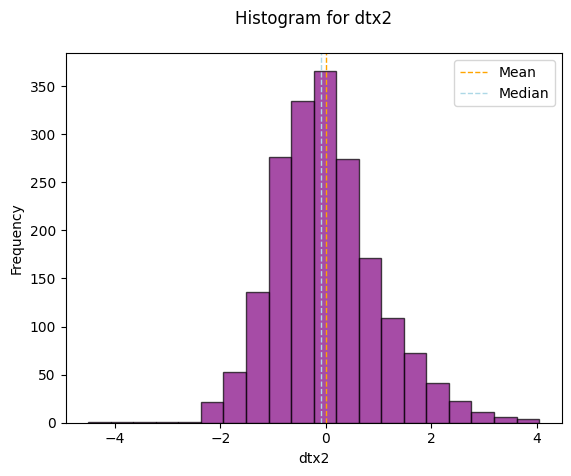

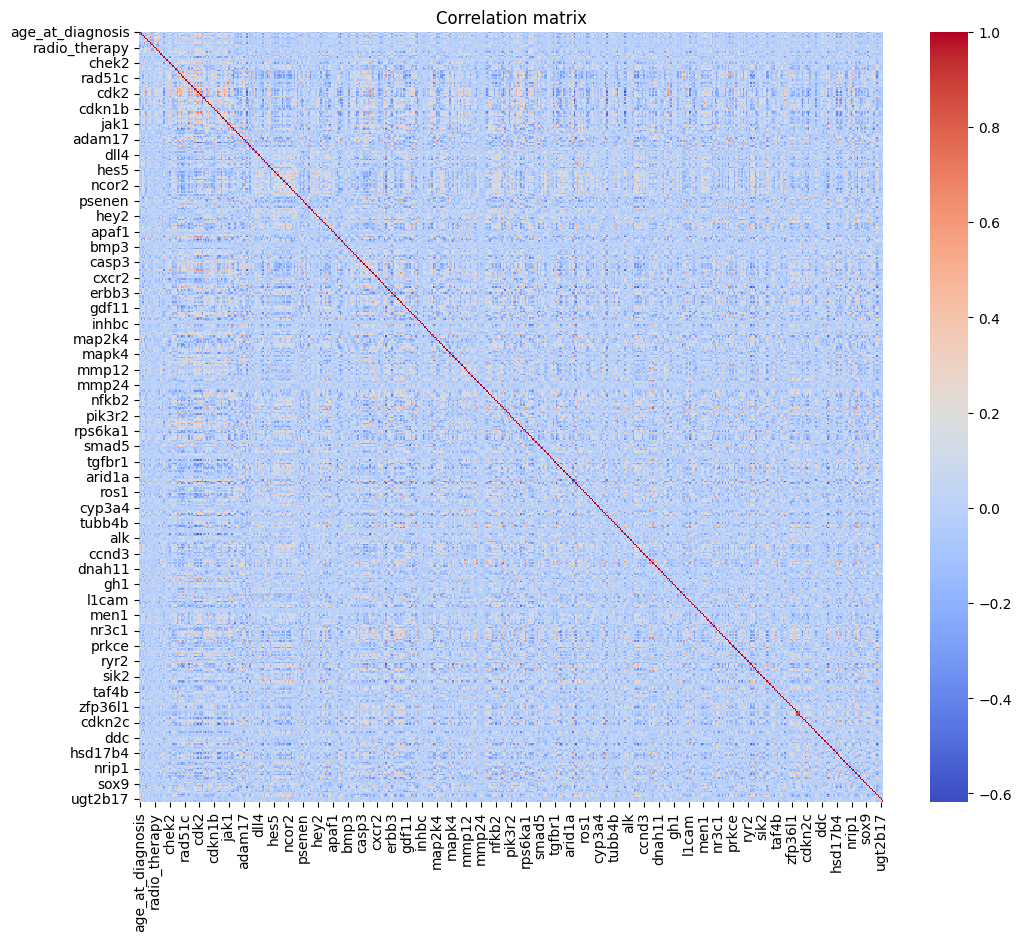

In [27]:
macierz_korelacji2 = df.iloc[:,1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(macierz_korelacji2, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

# ANALIZA DANYCH KATEGORYCZNYCH

In [5]:
df_text = df.drop(df.index[0])
df_text = df_text.select_dtypes(exclude=[np.number])
df_text

type_of_breast_surgery    cancer_type  \
1         BREAST CONSERVING  Breast Cancer   
2                MASTECTOMY  Breast Cancer   
3                MASTECTOMY  Breast Cancer   
4                MASTECTOMY  Breast Cancer   
5                MASTECTOMY  Breast Cancer   
...                     ...            ...   
1899      BREAST CONSERVING  Breast Cancer   
1900             MASTECTOMY  Breast Cancer   
1901             MASTECTOMY  Breast Cancer   
1902             MASTECTOMY  Breast Cancer   
1903      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  \
1              Breast Invasive Ductal Carcinoma        High   
2              Breast Invasive Ductal Carcinoma        High   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate   
4     Breast Mixed Ductal and Lobular Carcinoma        High   
5              Breast Invasive Ductal Carcinoma    Moderate   
...                                         ...         ...   
1899          Breast Invasive Lobular Carcinoma        High   
1900           Breast Invasive Ductal Carcinoma        High   
1901           Breast Invasive Ductal Carcinoma        High   
1902           Breast Invasive Ductal Carcinoma    Moderate   
1903           Breast Invasive Ductal Carcinoma        High   

     pam50_+_claudin-low_subtype er_status_measured_by_ihc er_status  \
1                           LumA                   Positve  Positive   
2                           LumB                   Positve  Positive   
3                           LumB                   Positve  Positive   
4                           LumB                   Positve  Positive   
5                           LumB                   Positve  Positive   
...                          ...                       ...       ...   
1899                        LumA                   Positve  Positive   
1900                        LumB                   Positve  Positive   
1901                        LumB                   Positve  Positive   
1902                        LumB                   Positve  Positive   
1903                        LumB                   Positve  Positive   

     her2_status_measured_by_snp6 her2_status tumor_other_histologic_subtype  \
1                         NEUTRAL    Negative                     Ductal/NST   
2                         NEUTRAL    Negative                     Ductal/NST   
3                         NEUTRAL    Negative                          Mixed   
4                         NEUTRAL    Negative                          Mixed   
5                         NEUTRAL    Negative                     Ductal/NST   
...                           ...         ...                            ...   
1899                      NEUTRAL    Negative                        Lobular   
1900                         GAIN    Positive                     Ductal/NST   
1901                      NEUTRAL    Negative                     Ductal/NST   
1902                      NEUTRAL    Negative                     Ductal/NST   
1903                      NEUTRAL    Negative                     Ductal/NST   

      ... mtap_mut ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut hras_mut  \
1     ...        0          0           0        0          0        0   
2     ...        0          0           0        0          0        0   
3     ...        0          0           0        0          0        0   
4     ...        0          0           0        0          0        0   
5     ...        0          0           0        0          0        0   
...   ...      ...        ...         ...      ...        ...      ...   
1899  ...        0          0           0        0          0        0   
1900  ...        0          0           0        0          0        0   
1901  ...        0          0           0        0          0        0   
1902  ...        0          0           0        0          0        0   
1903  ...        0          0           0        0     

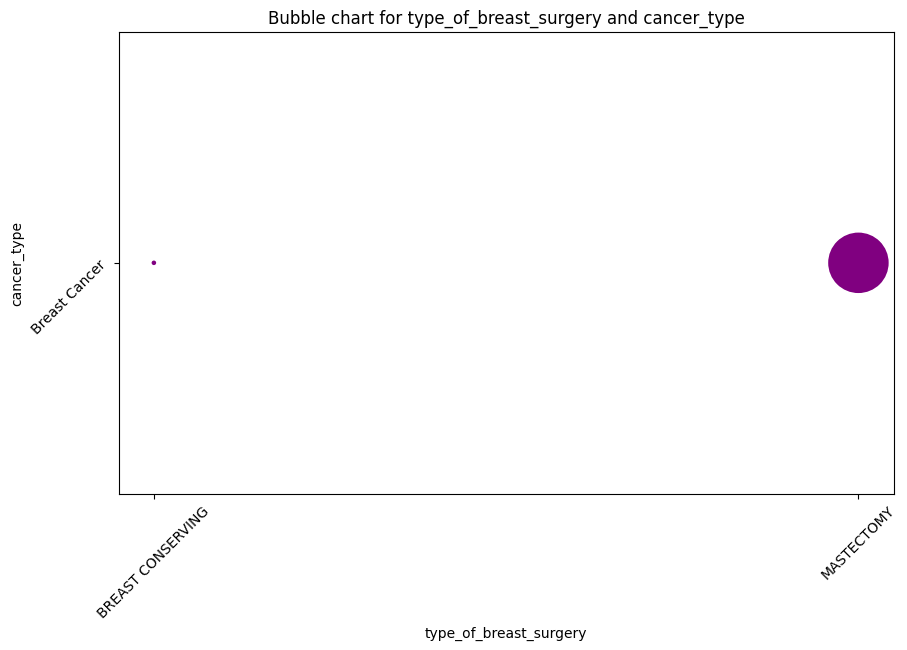

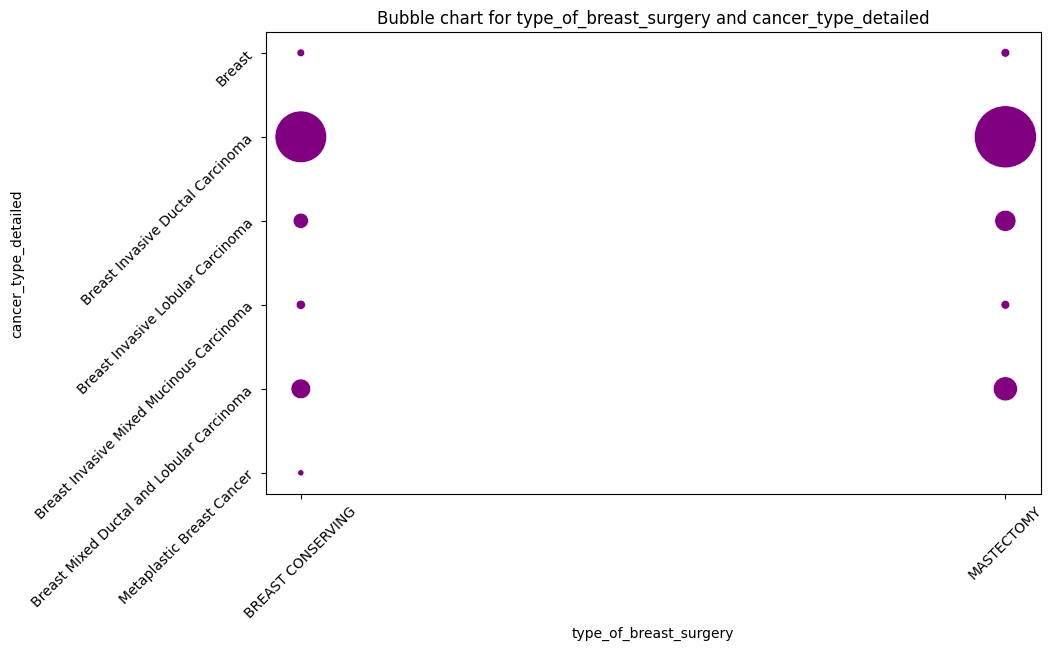

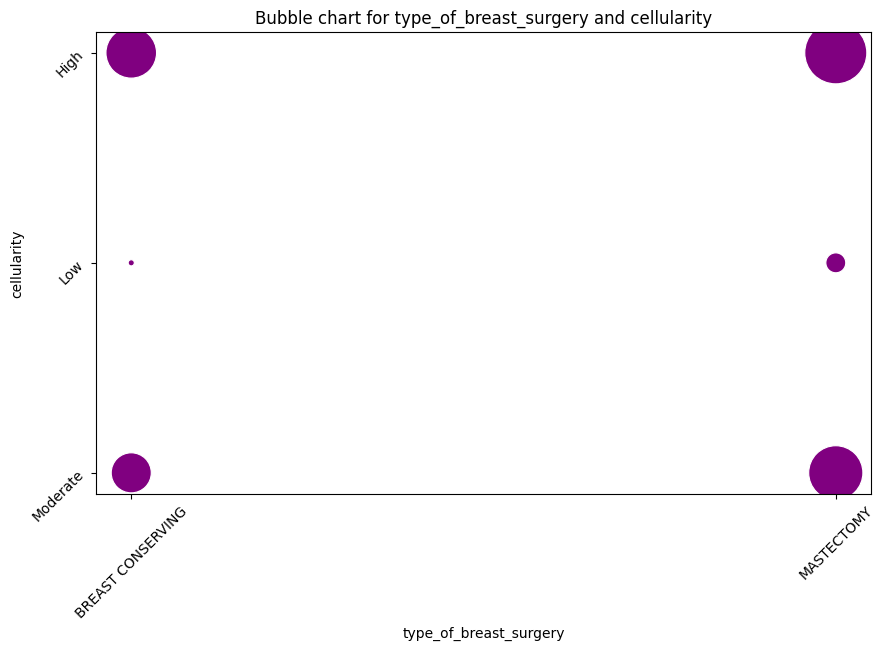

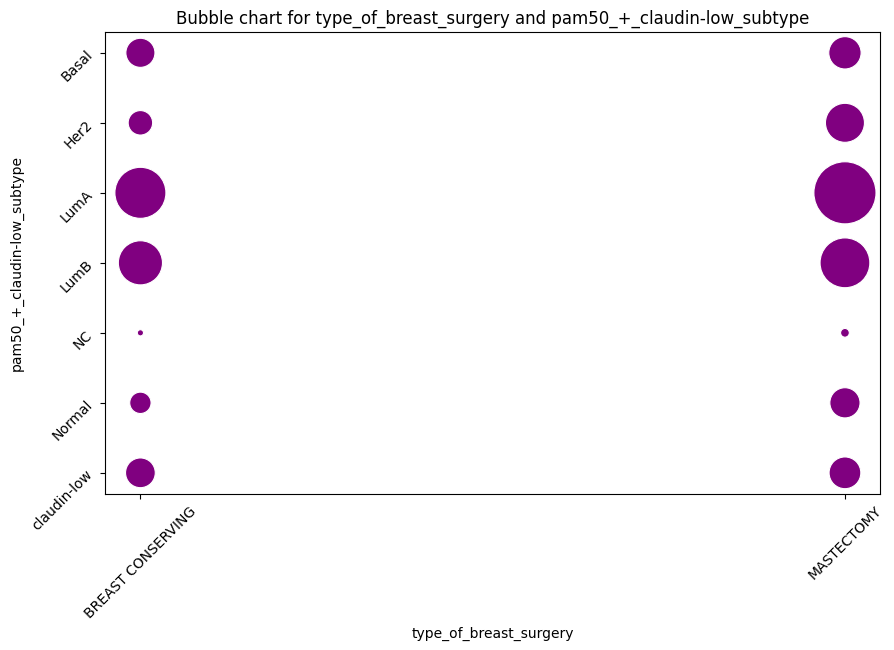

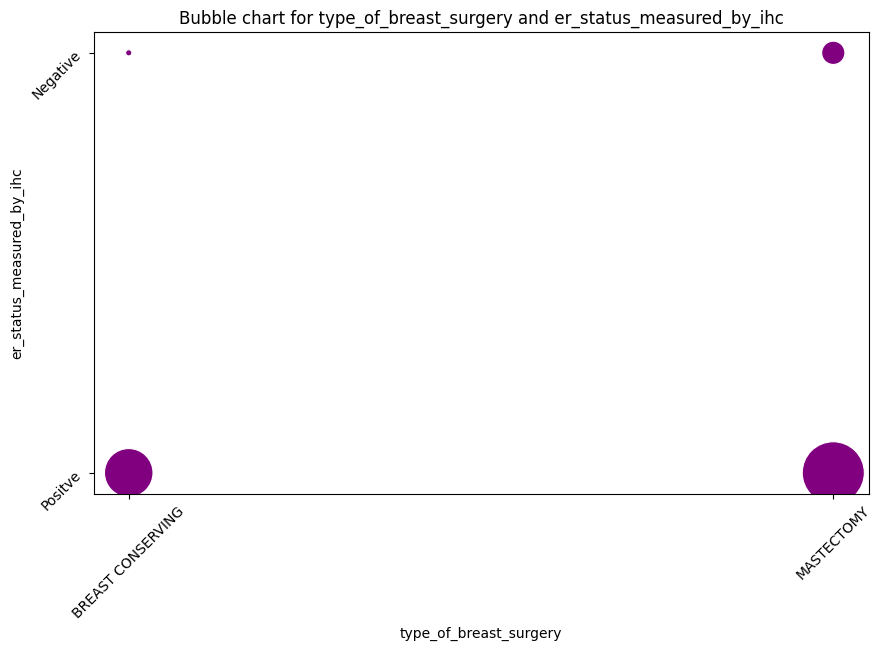

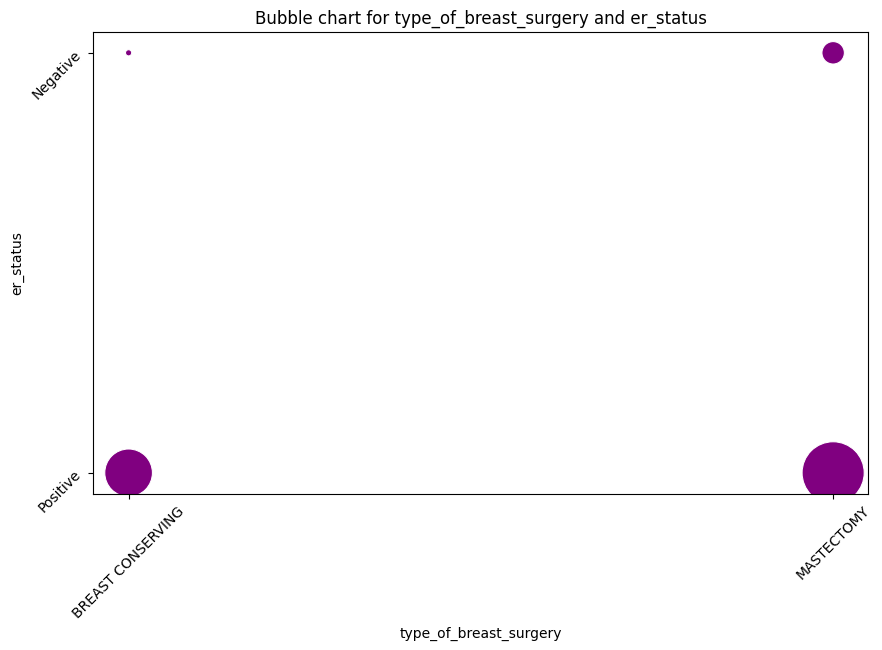

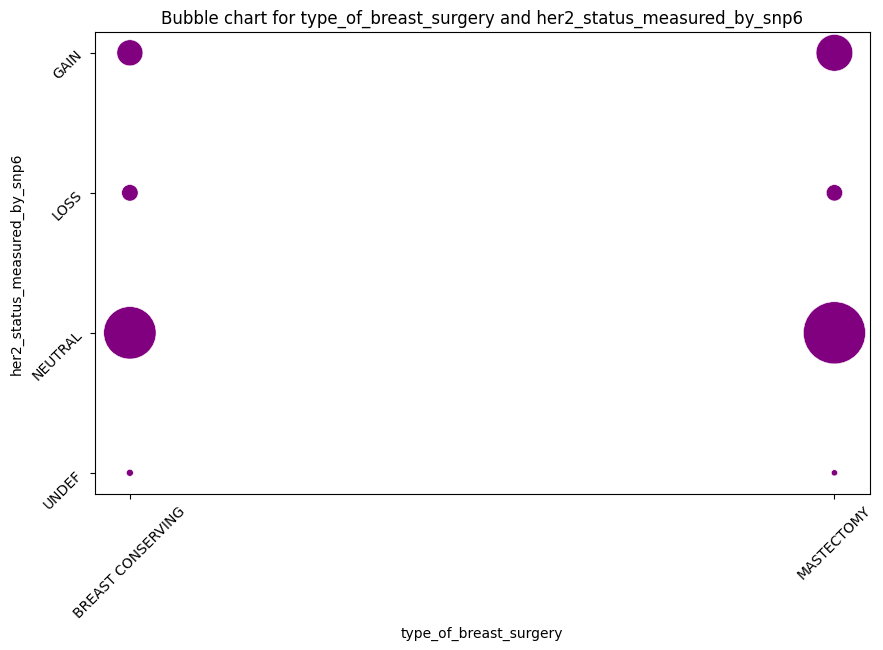

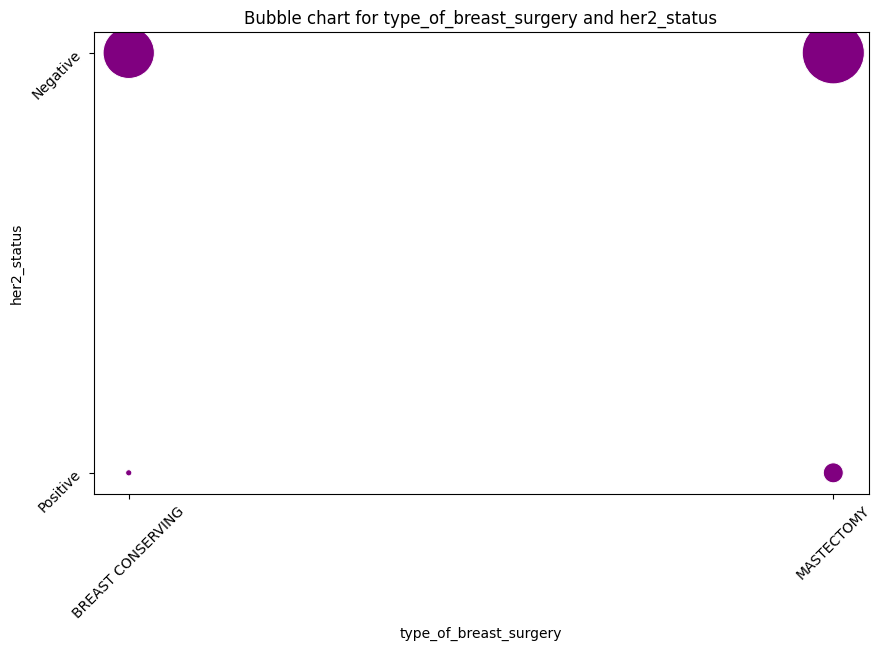

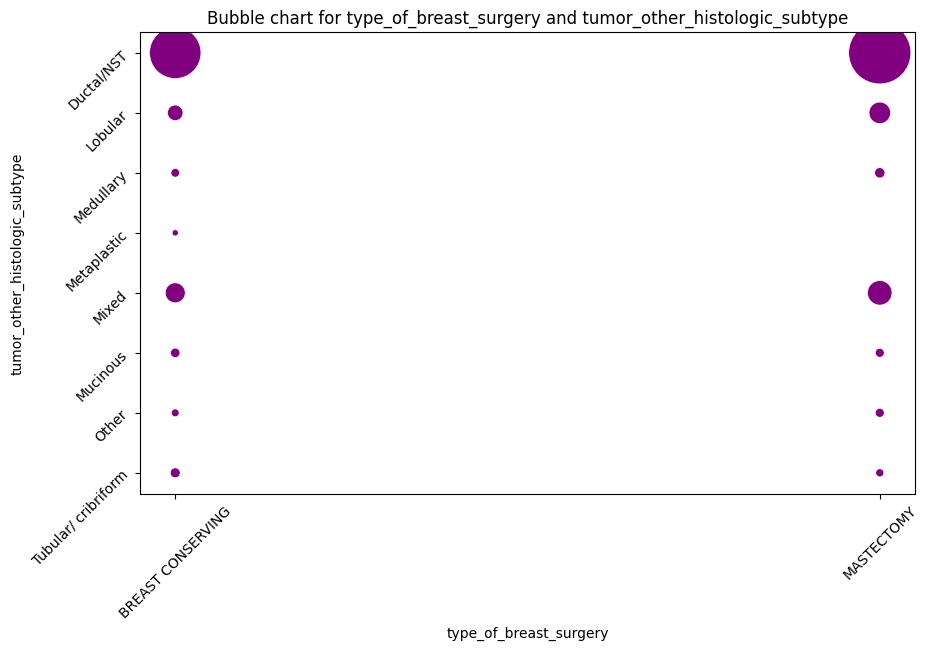

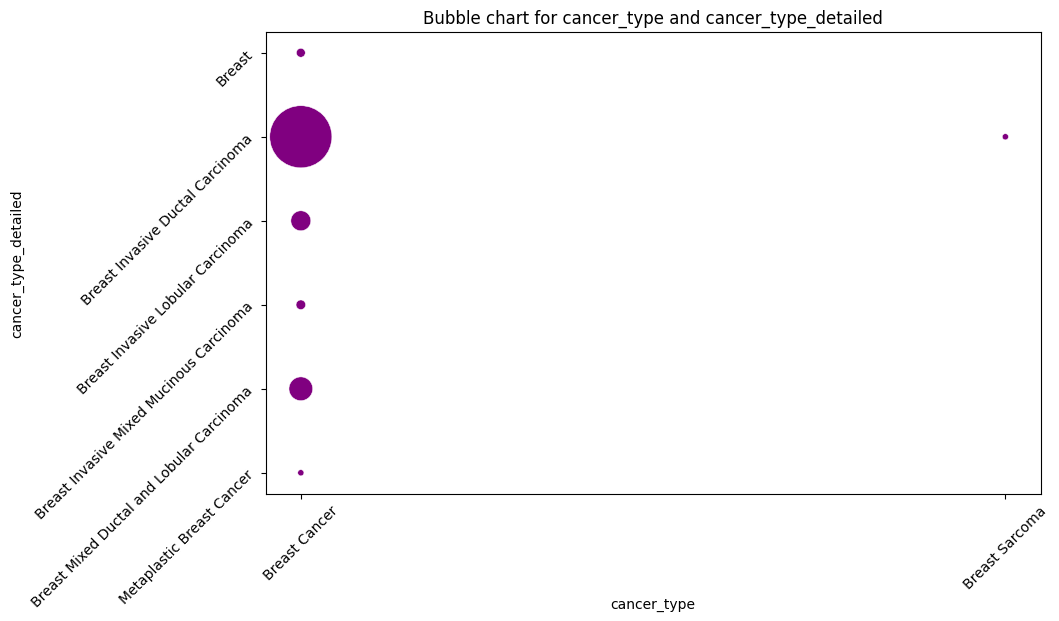

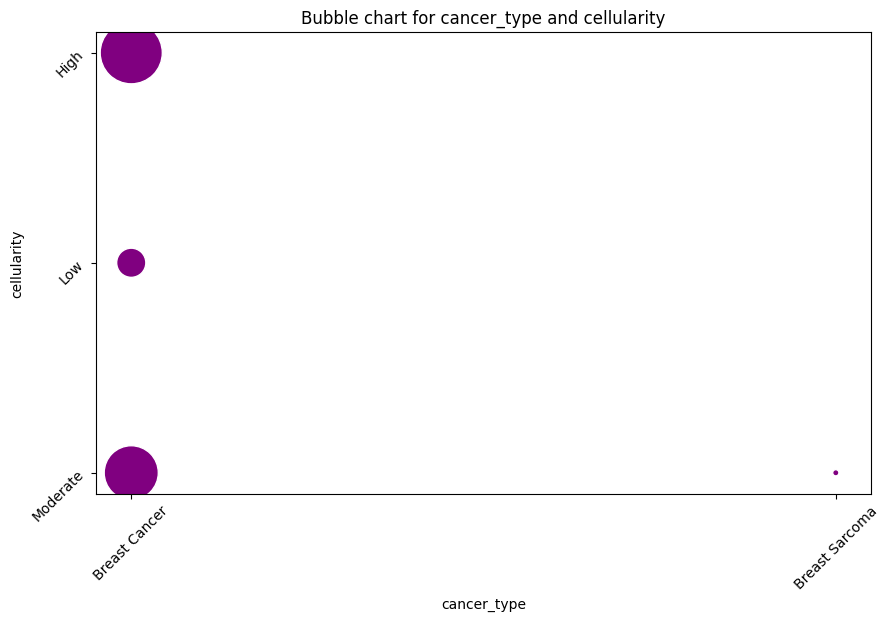

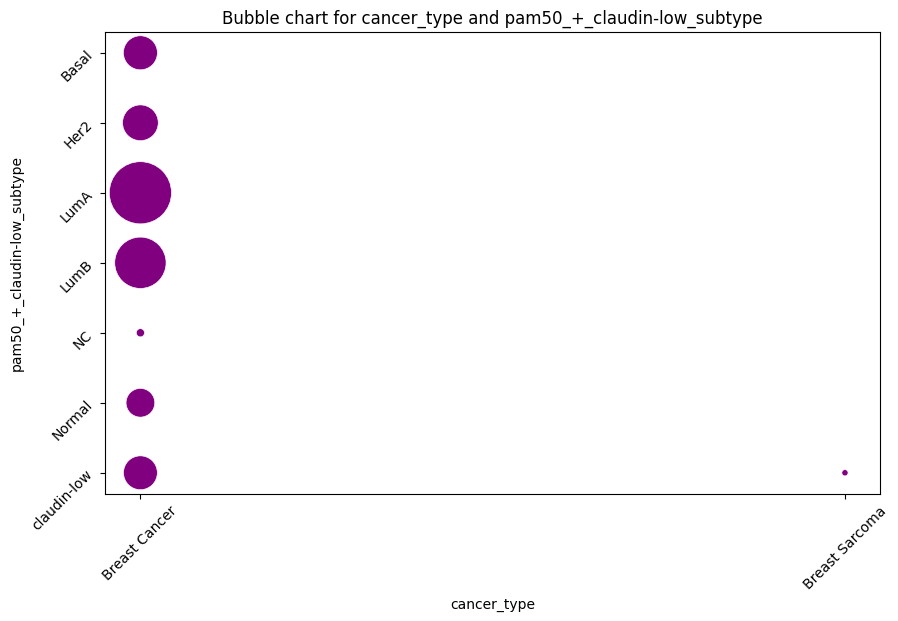

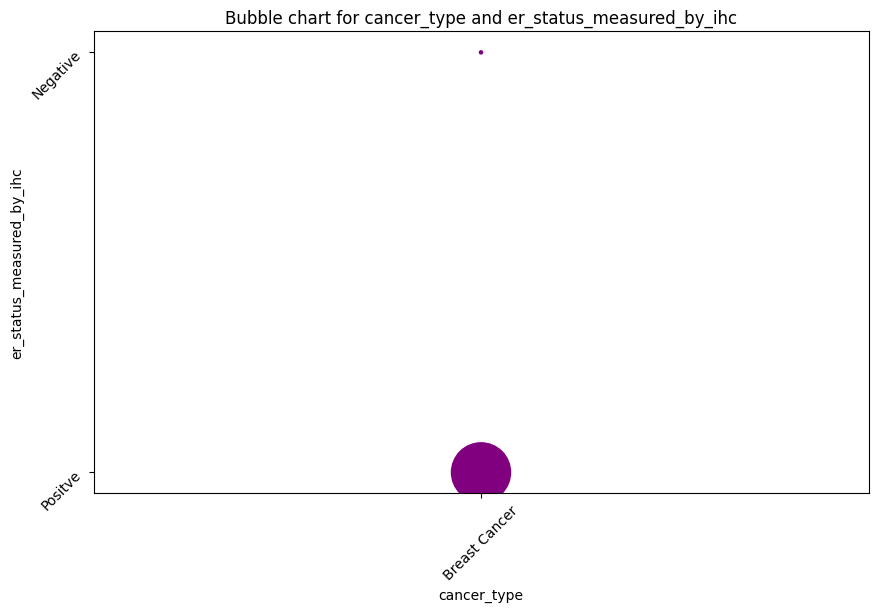

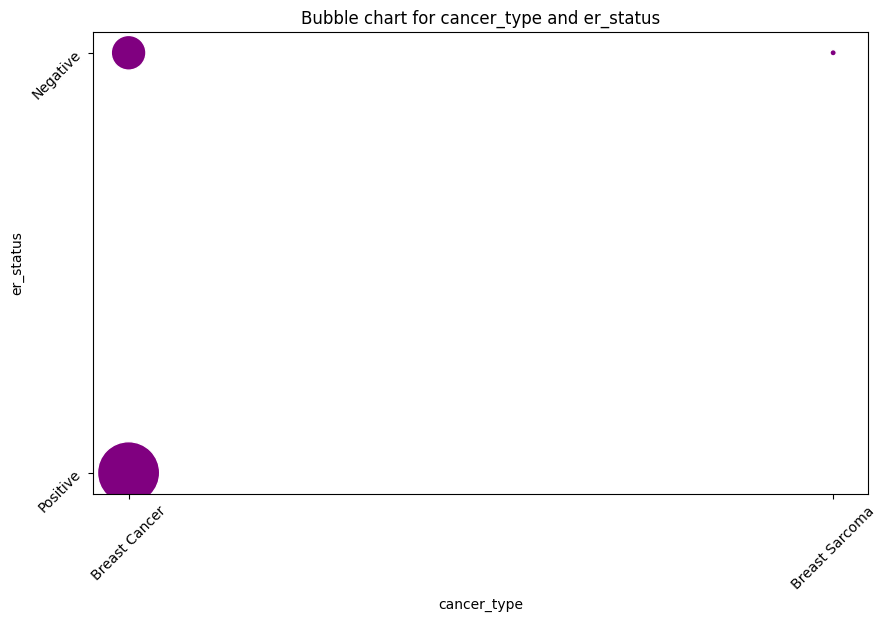

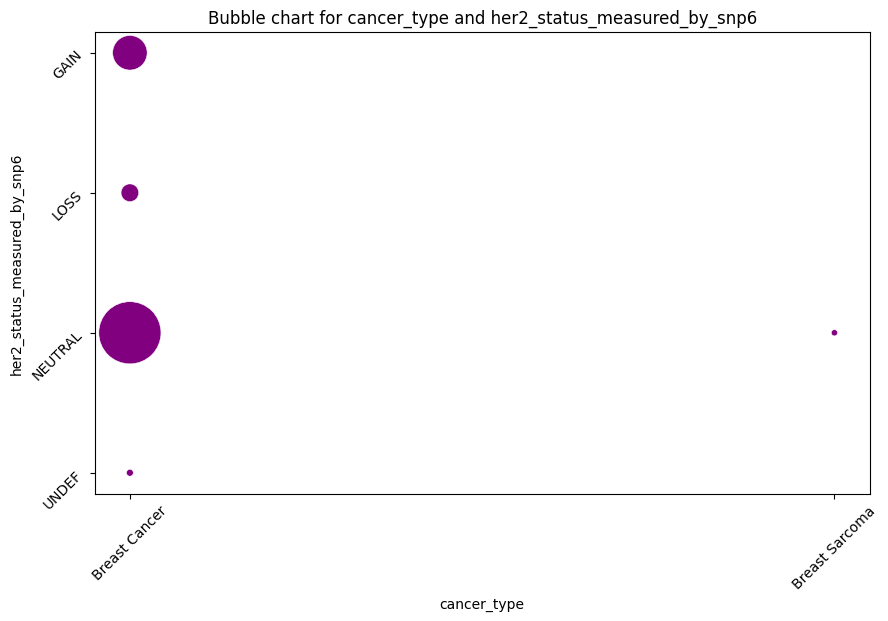

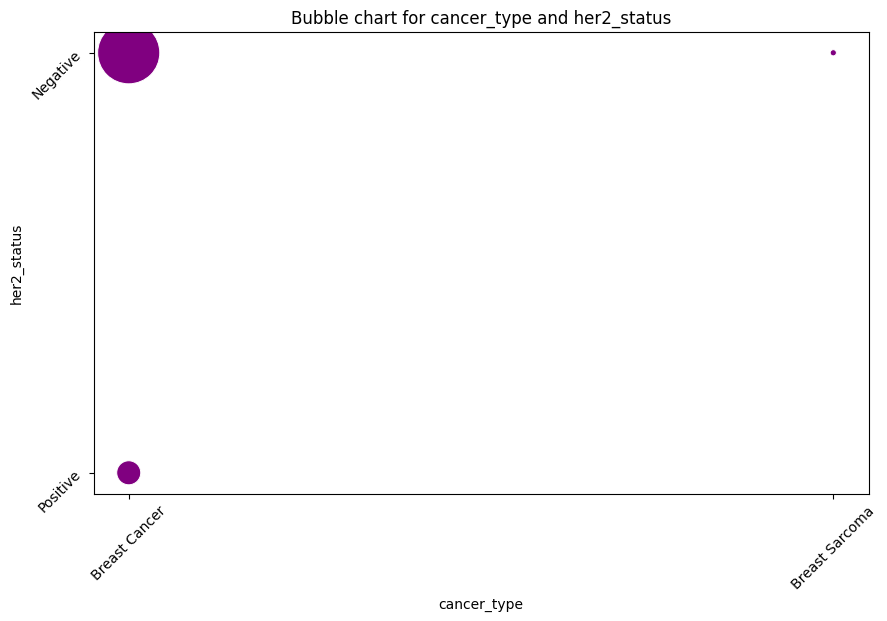

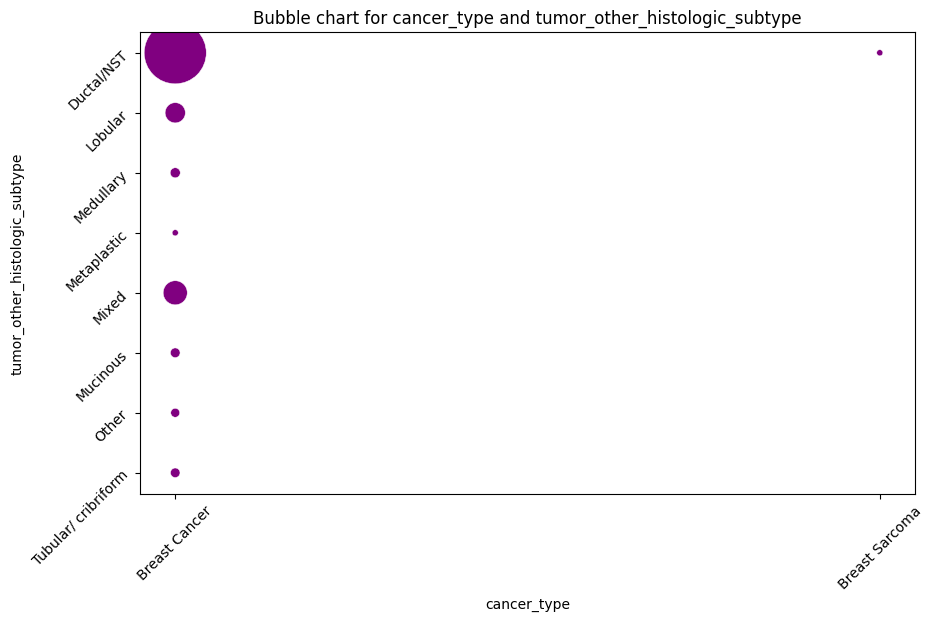

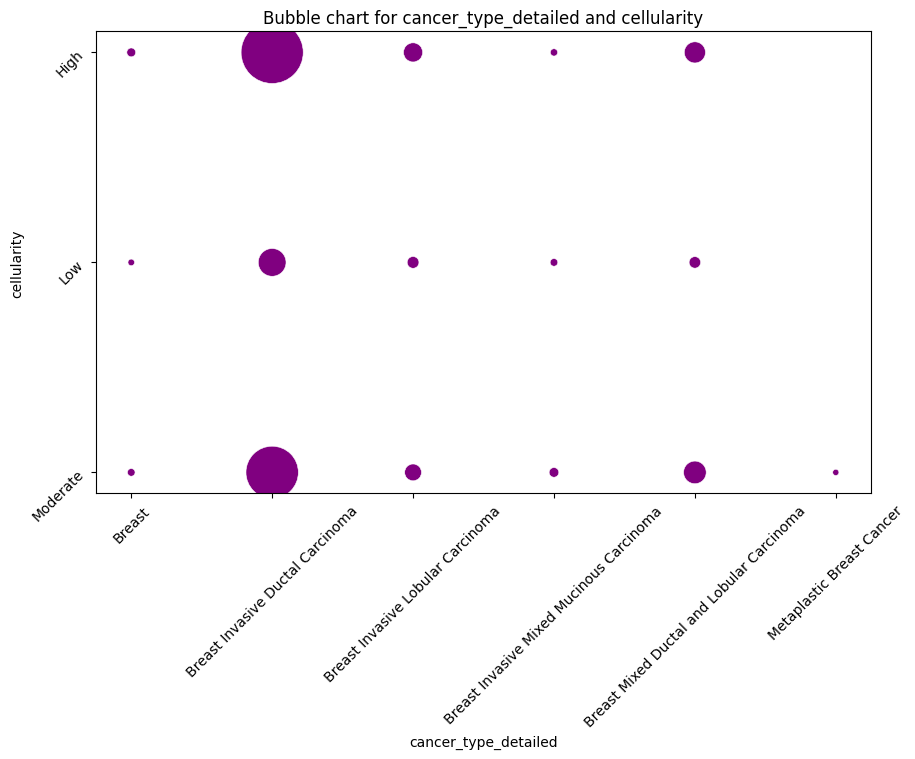

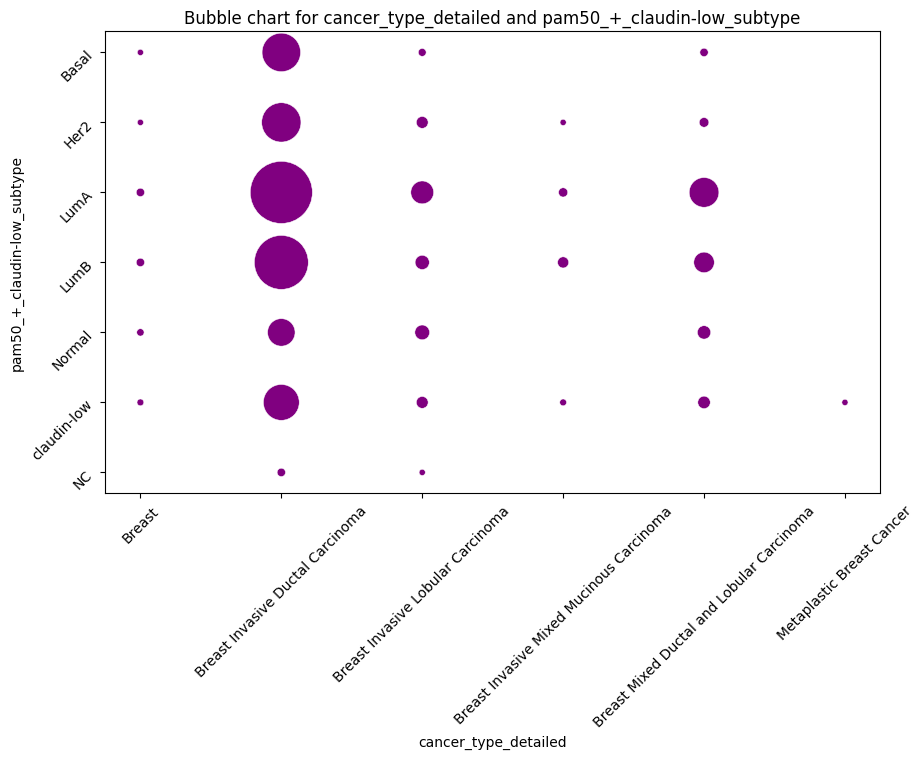

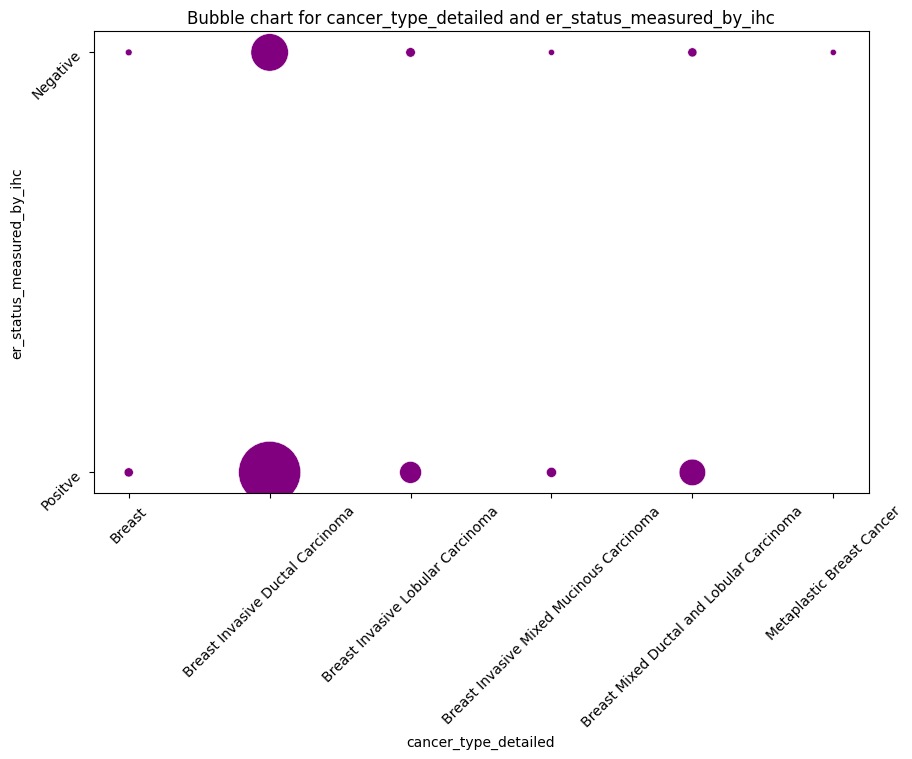

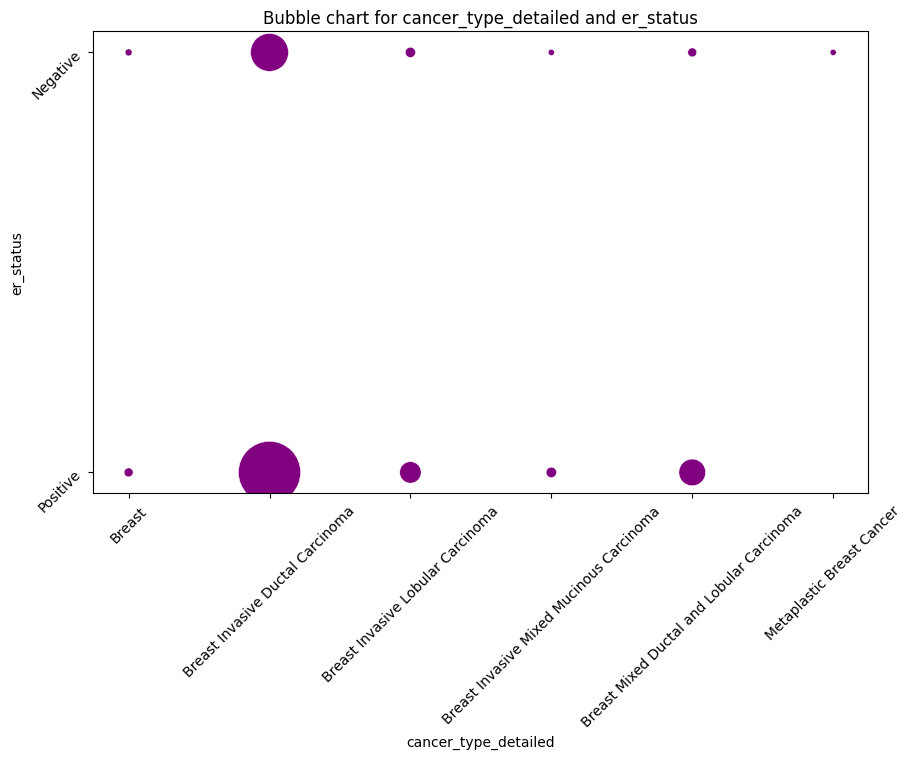

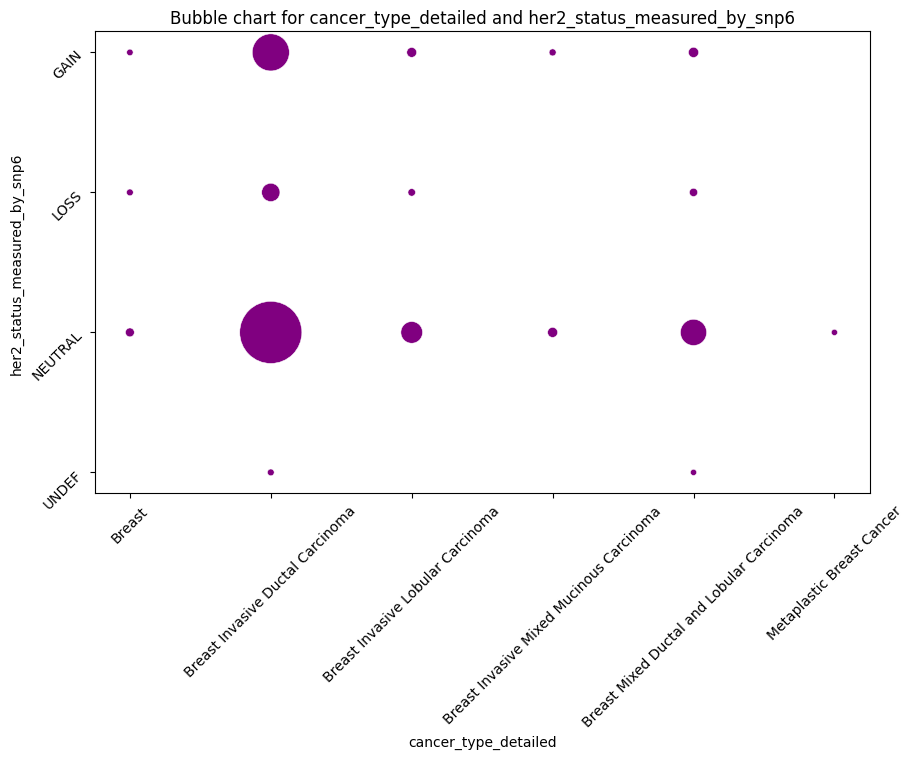

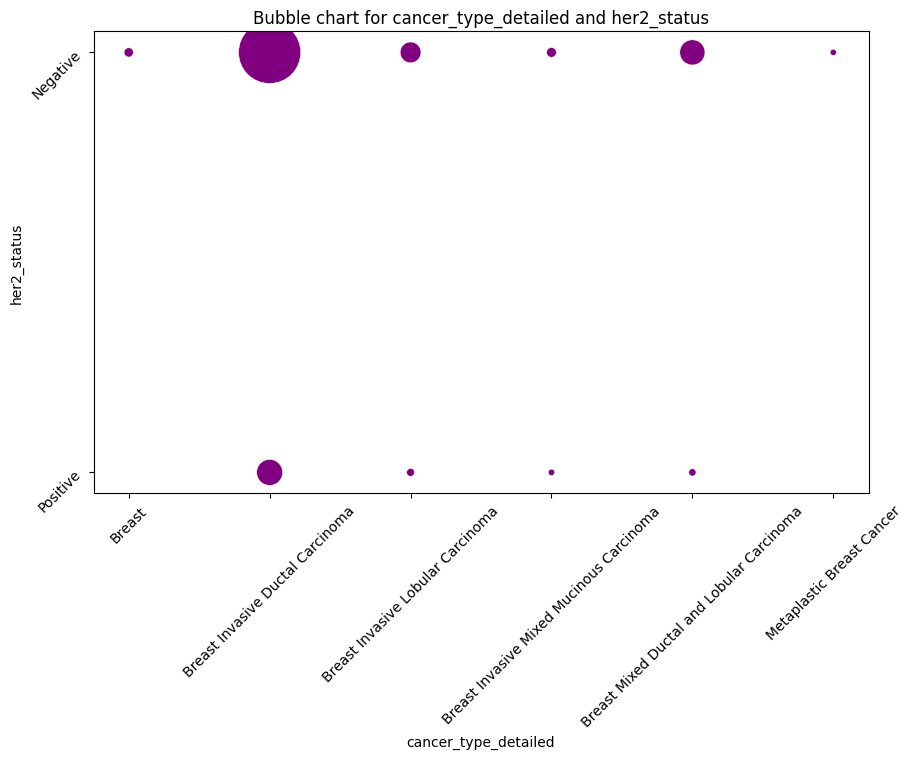

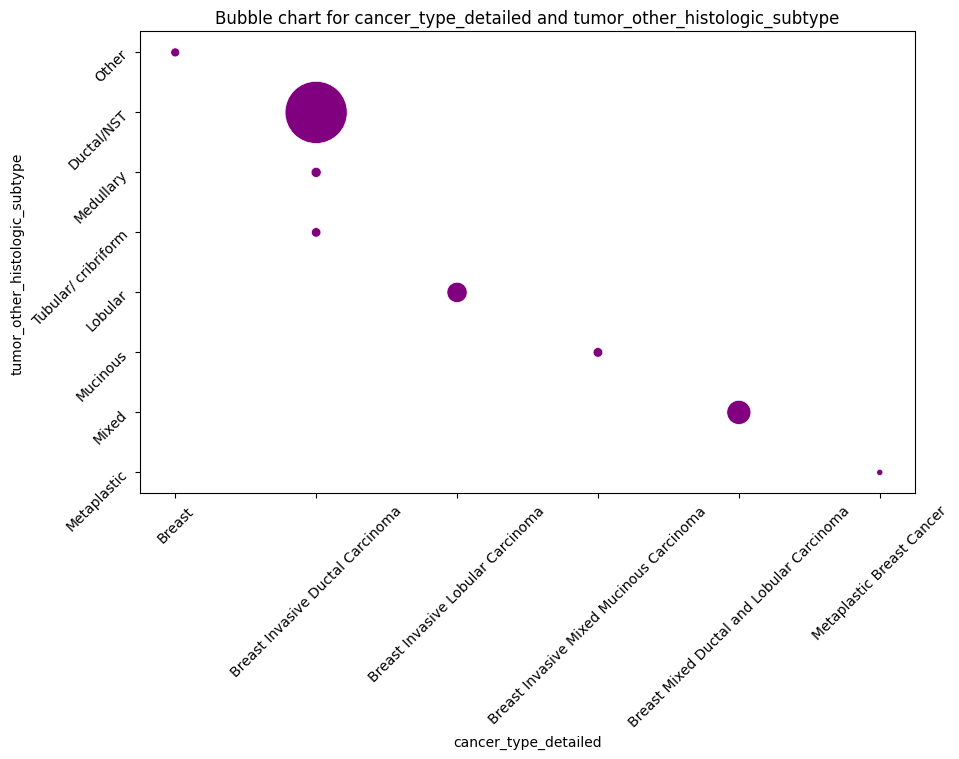

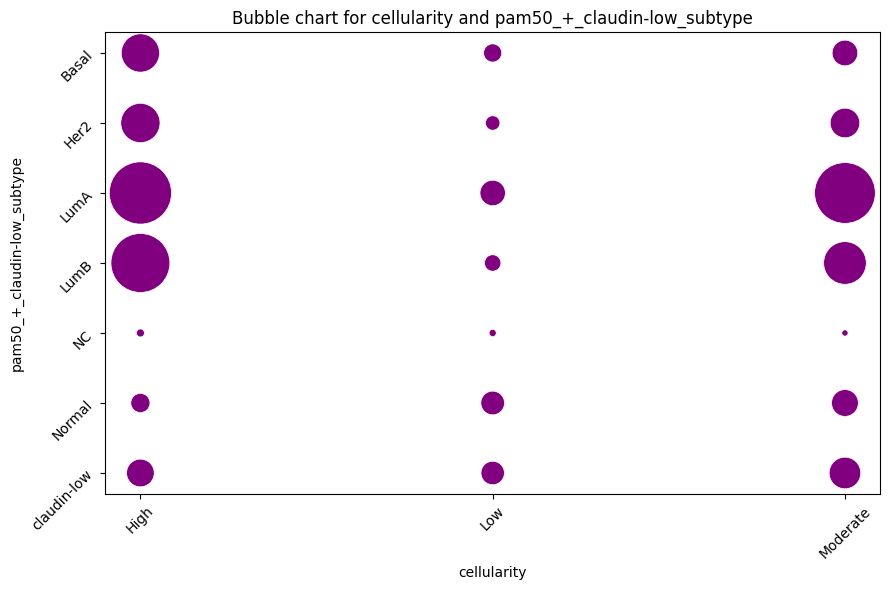

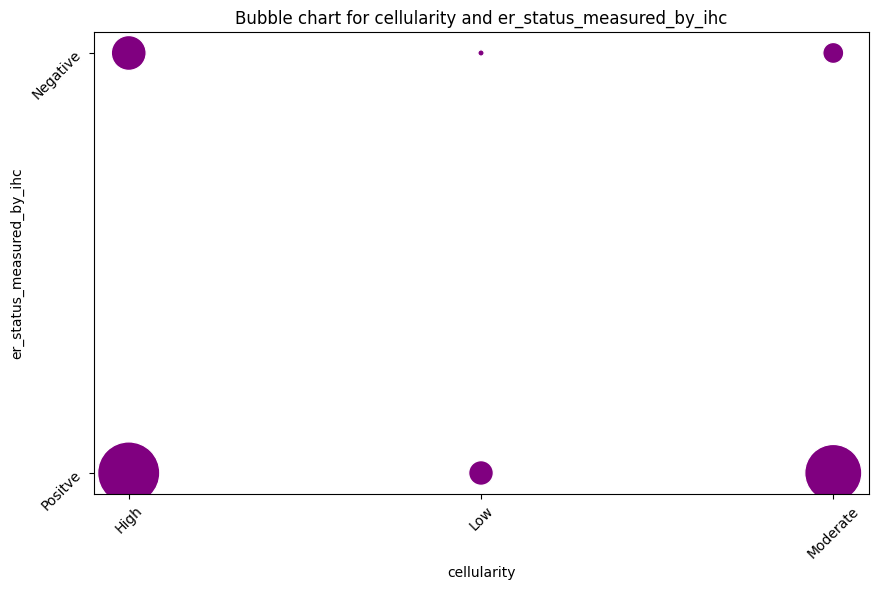

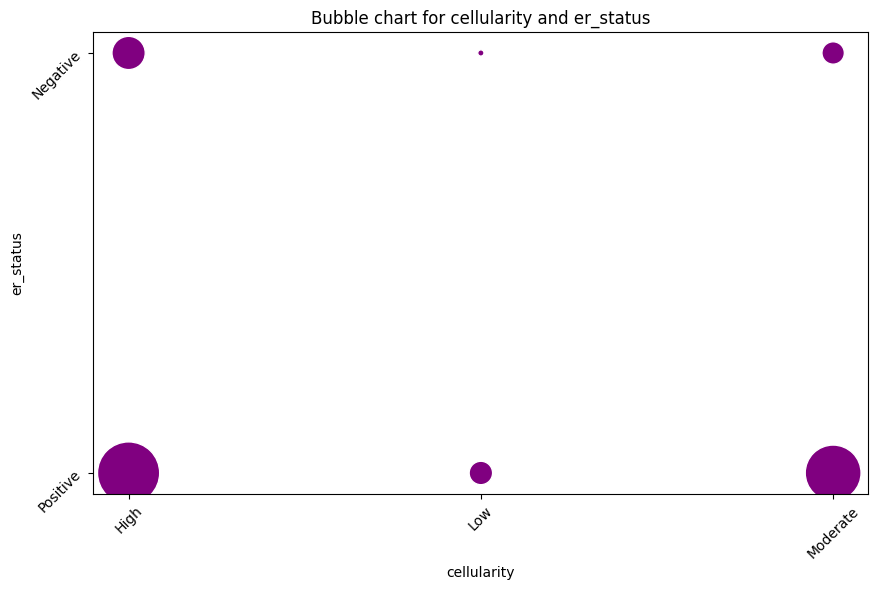

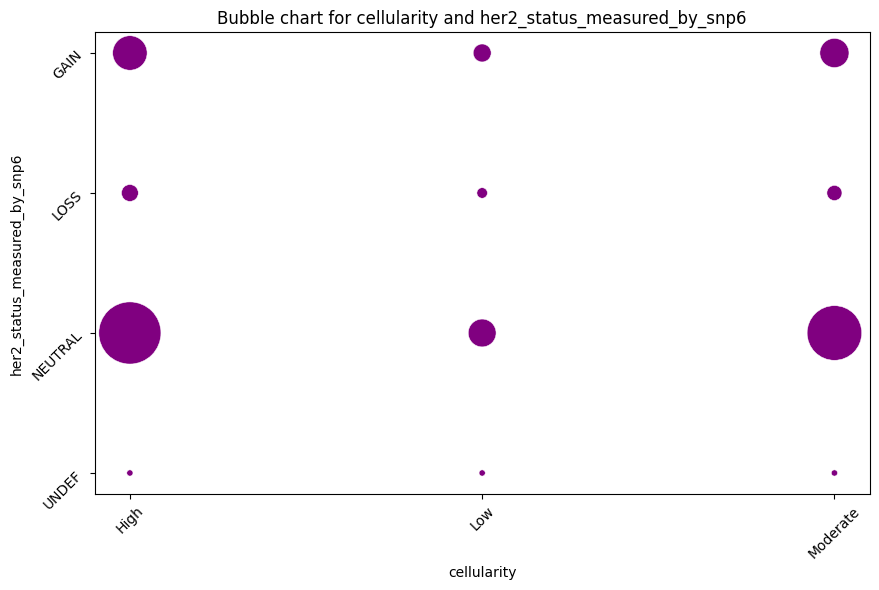

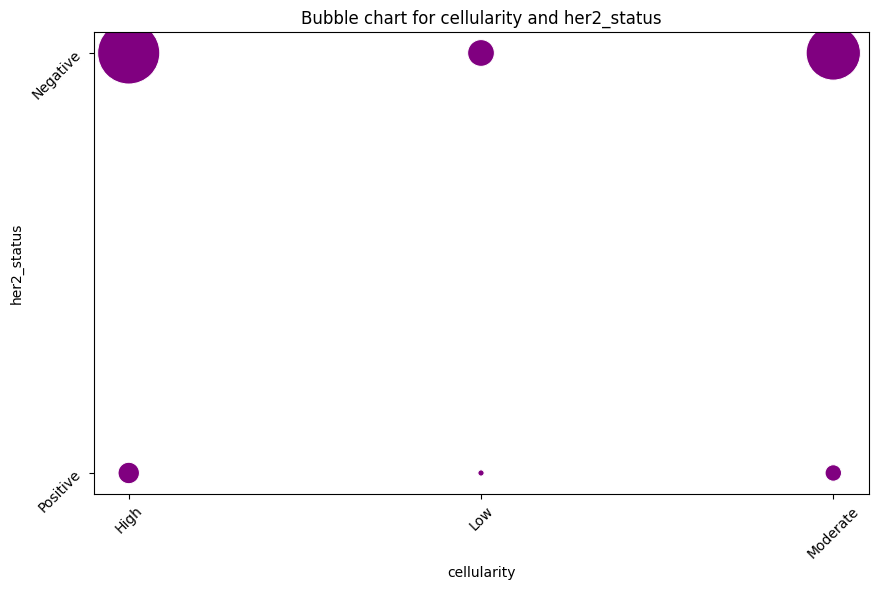

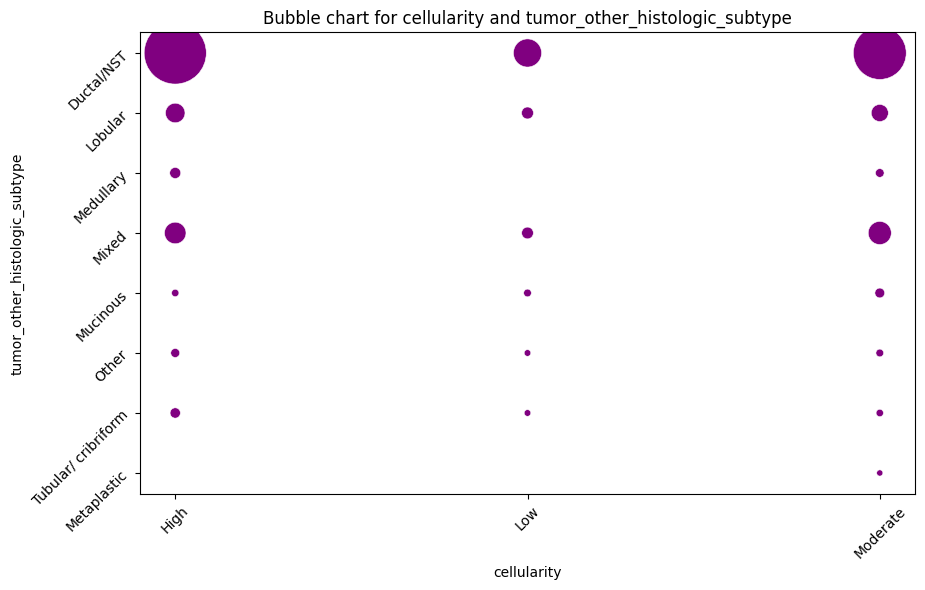

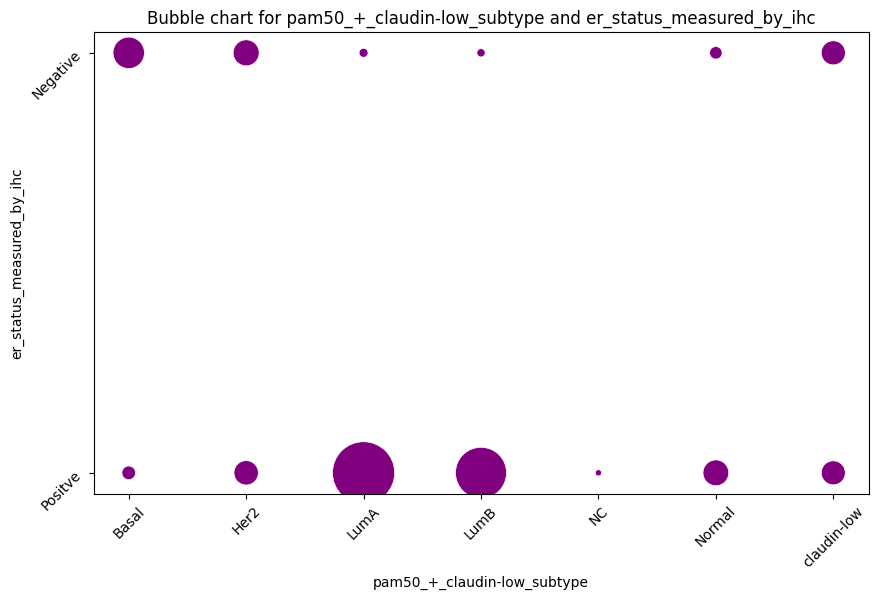

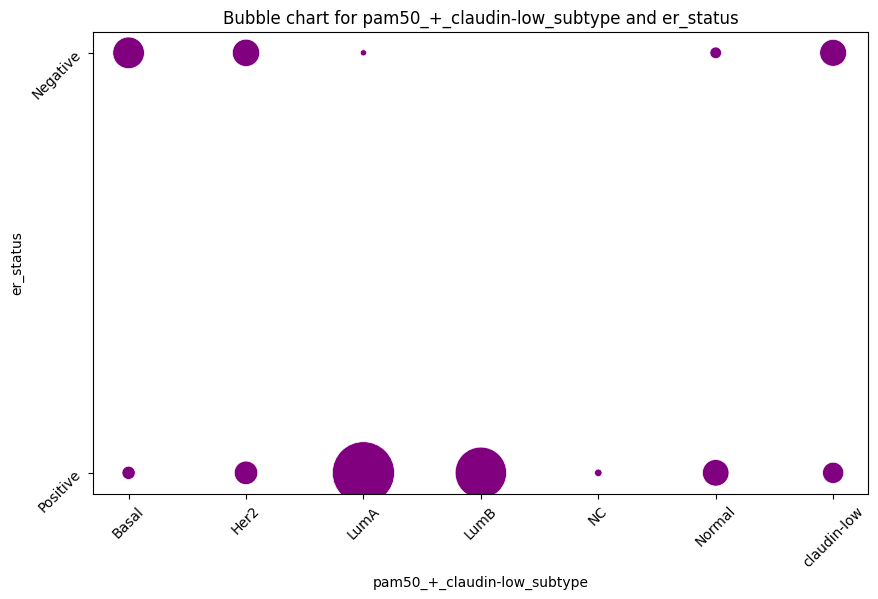

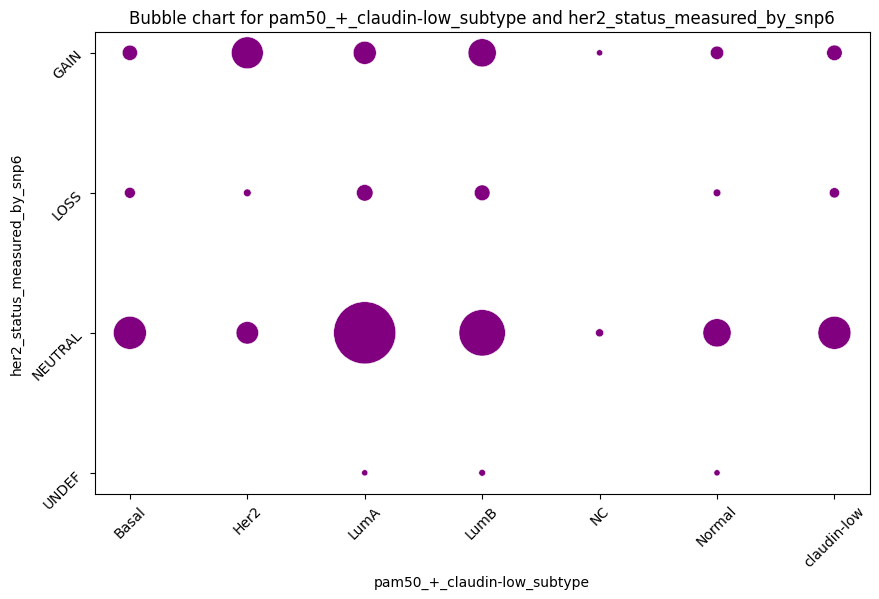

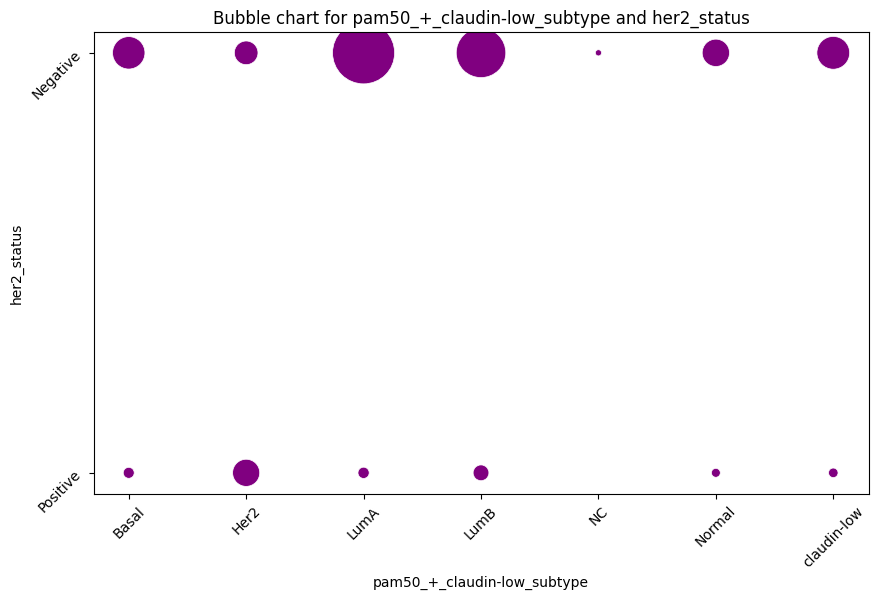

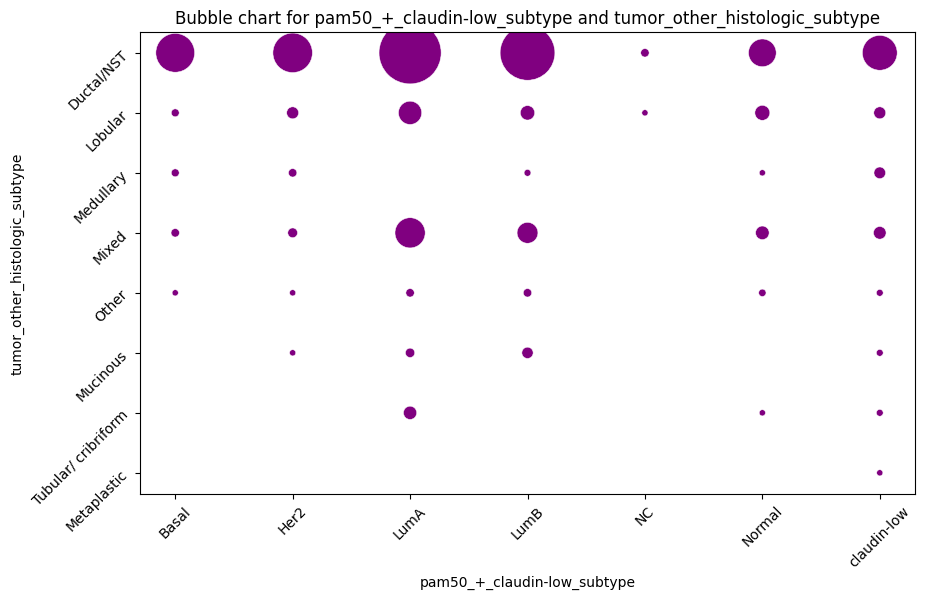

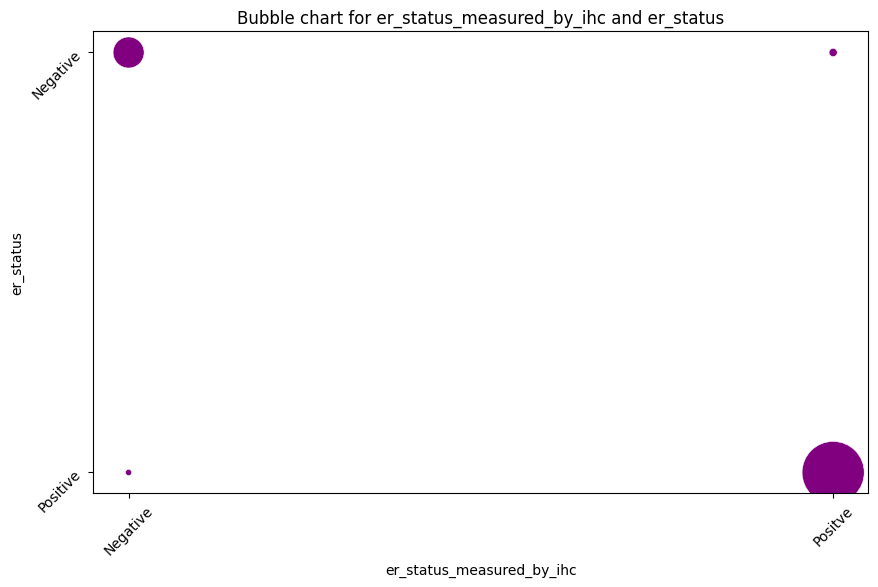

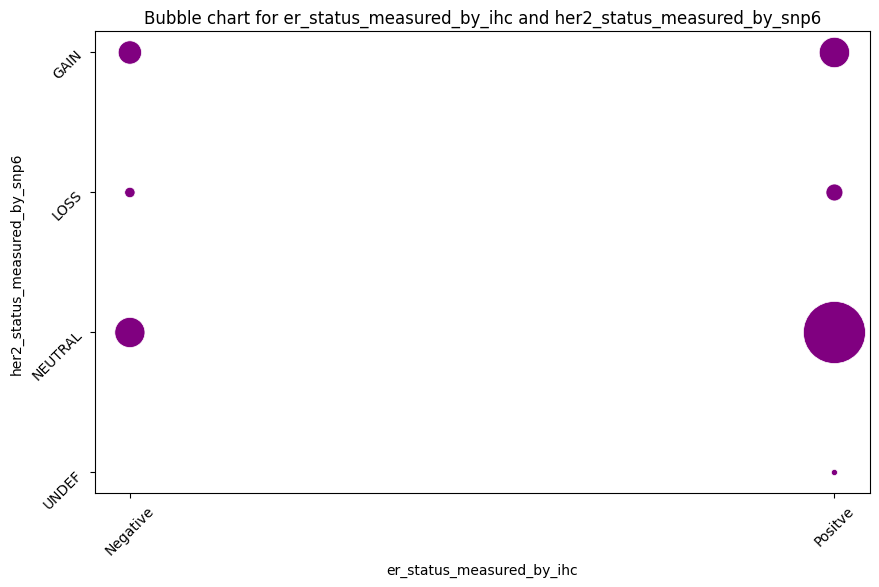

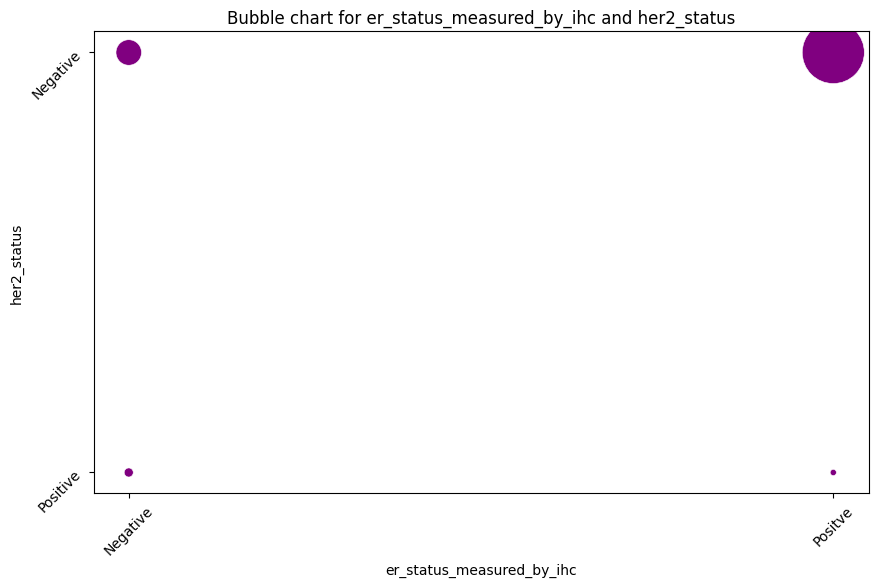

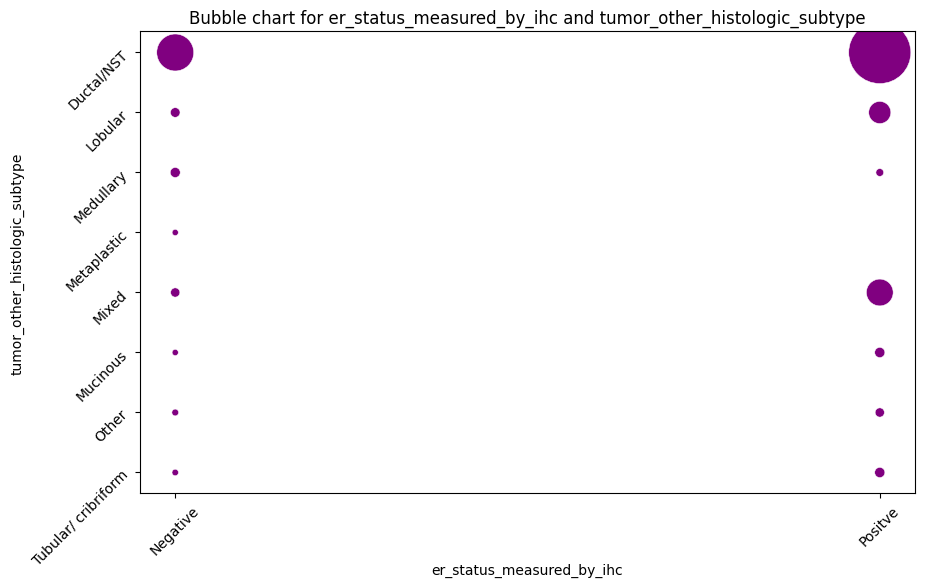

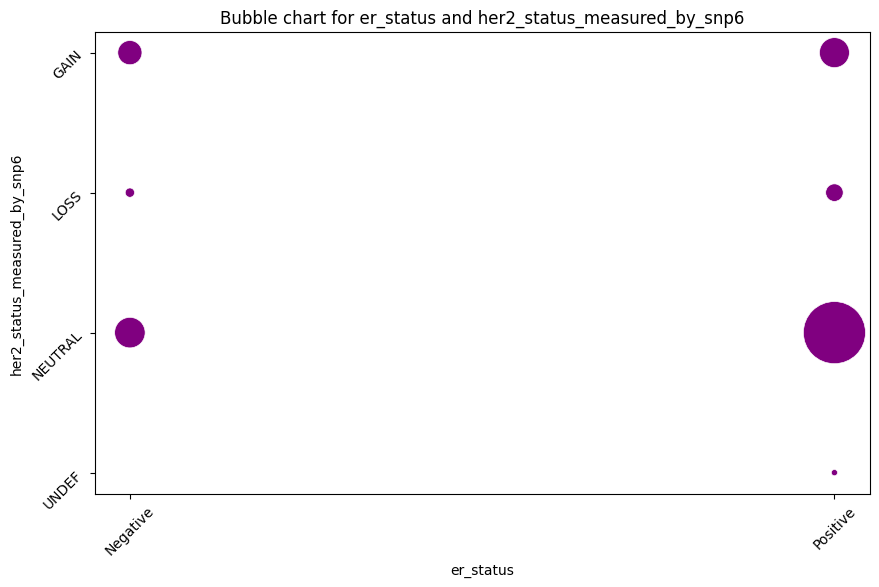

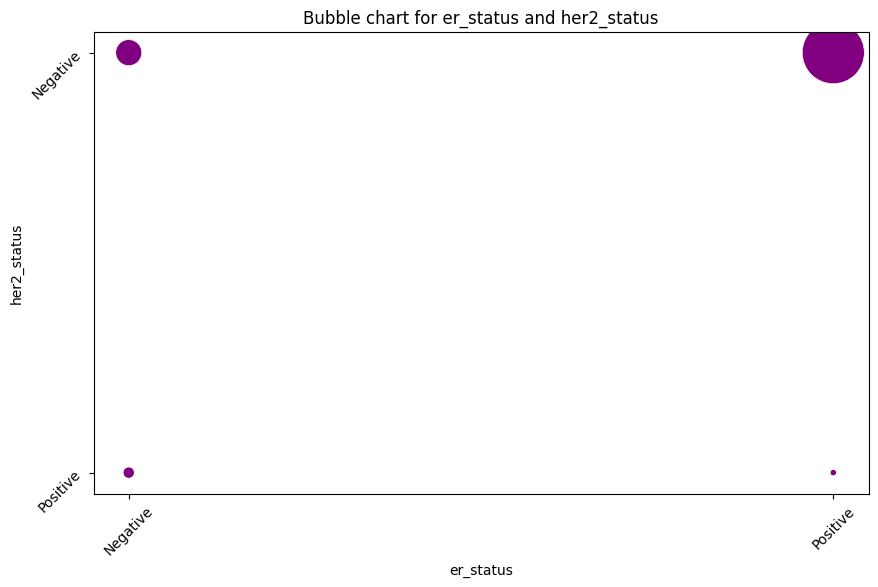

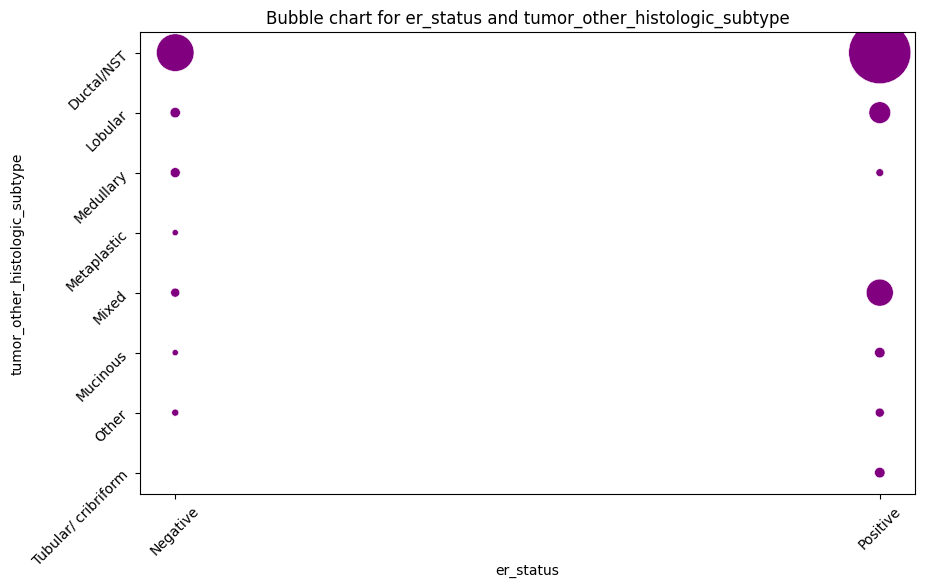

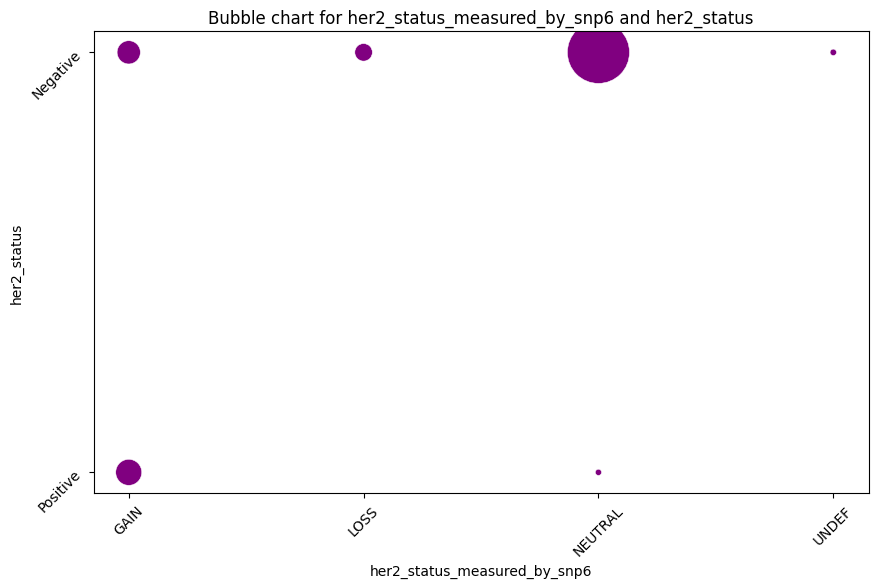

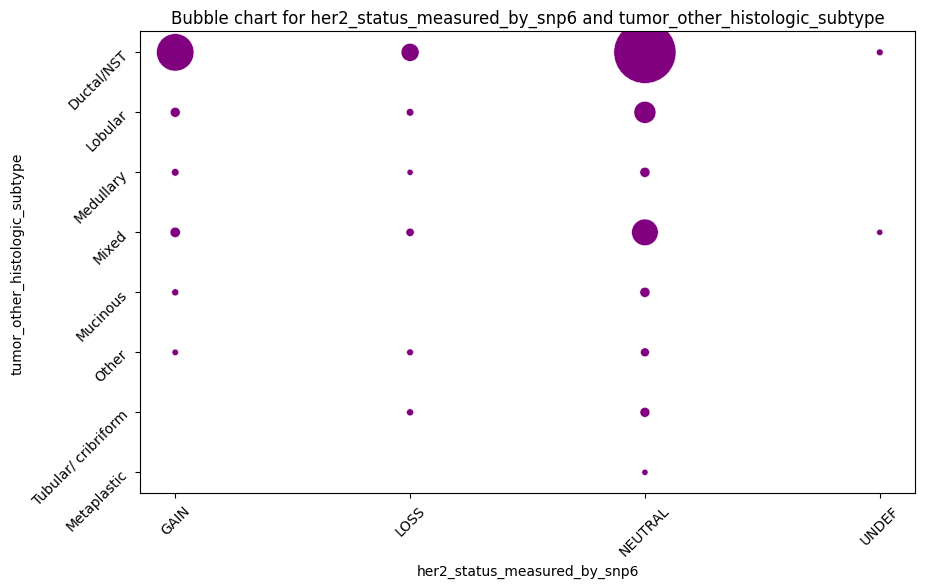

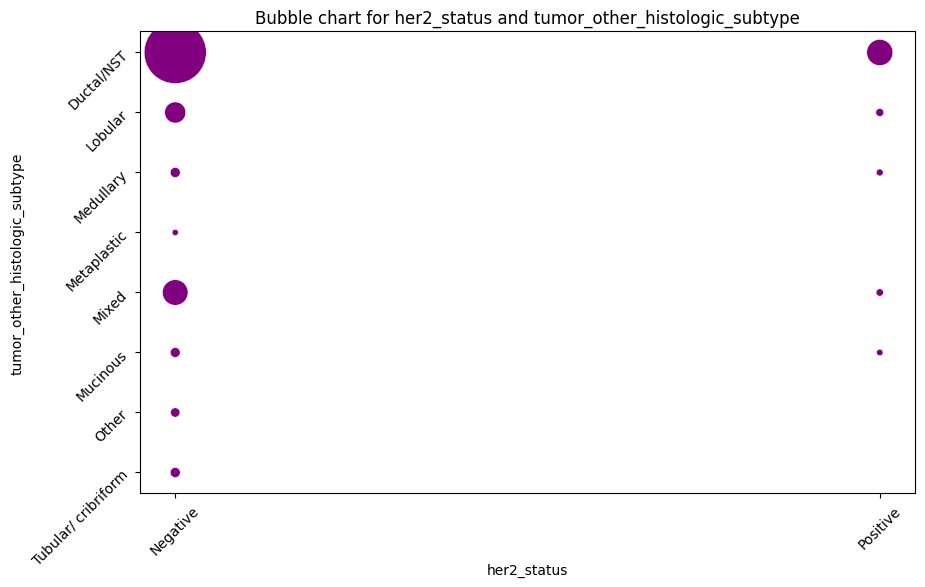

In [13]:
# Ograniczenie df_text do pierwszych 18 kolumn
df_text_limited = df_text.iloc[:, :10]

# Wybieranie wszystkich par kolumn (kombinacje 2 z 18)
pairs = list(itertools.combinations(df_text_limited.columns, 2))

# Tworzenie wykresów bąbelkowych dla każdej pary kolumn
for column1, column2 in pairs:
    # Tworzenie DataFrame z kombinacjami wartości z obu kolumn i liczbą ich wystąpień
    pair_counts = df_text_limited.groupby([column1, column2]).size().reset_index(name='counts')

    # Rysowanie wykresu bąbelkowego dla każdej pary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pair_counts, x=column1, y=column2, size='counts', legend=False, sizes=(20, 2000), color='purple')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(f'Bubble chart for {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


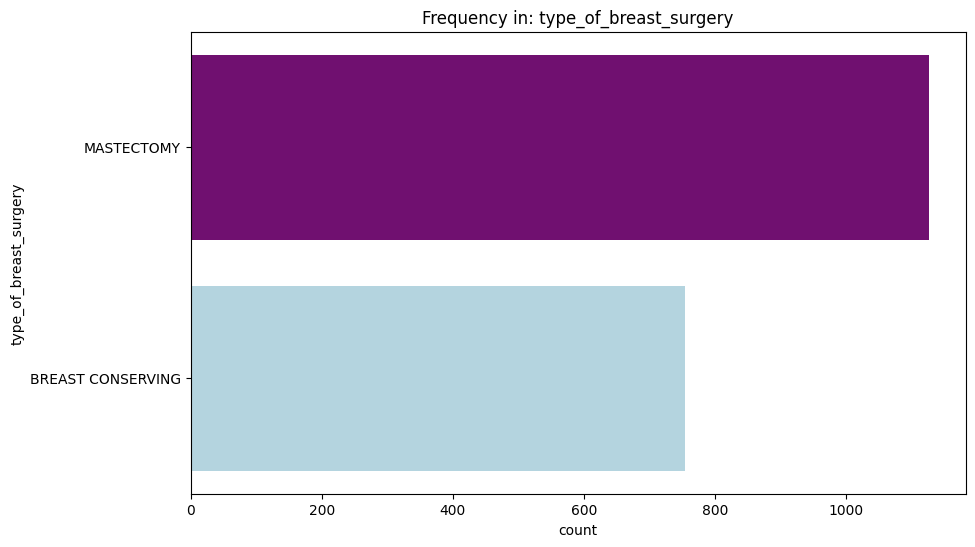

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


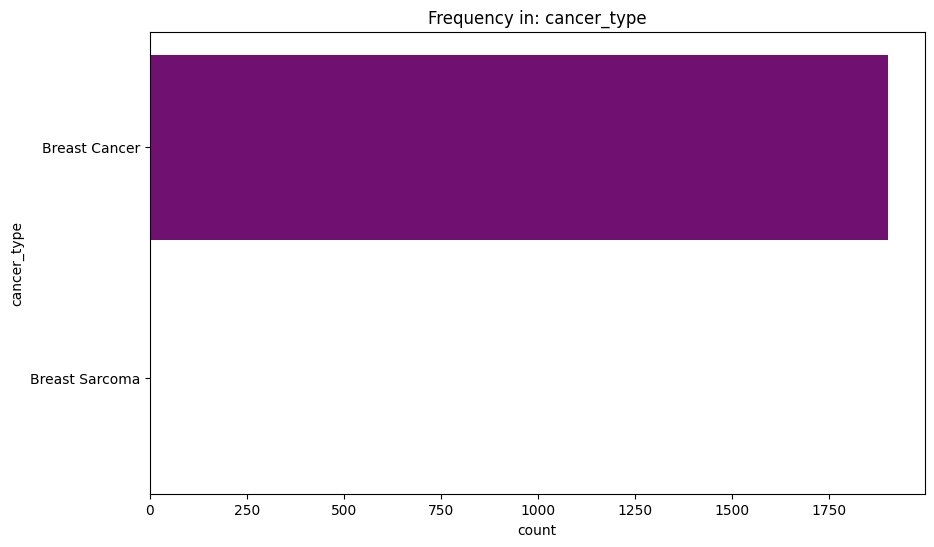

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


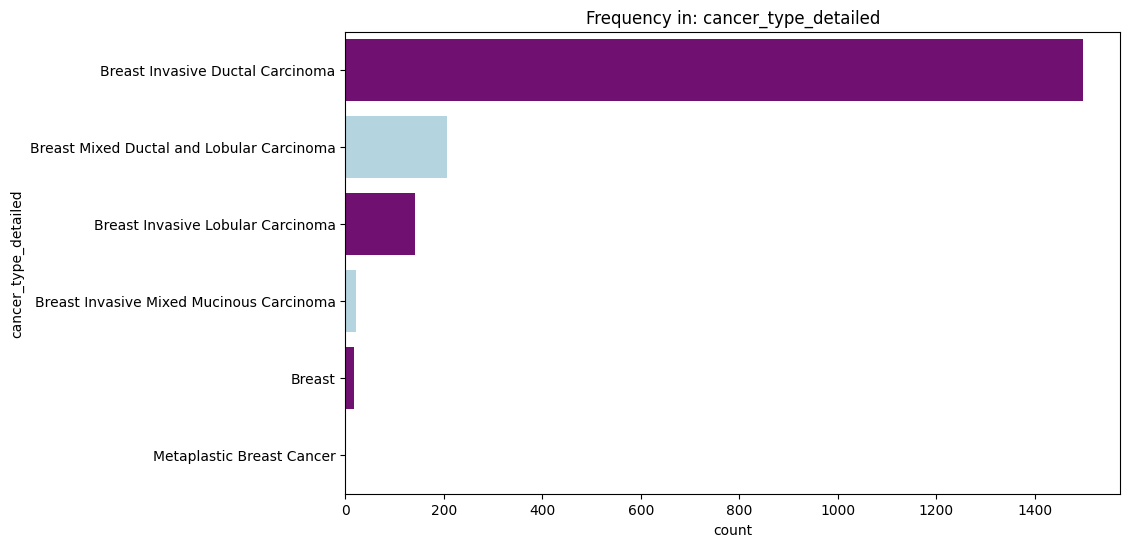

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


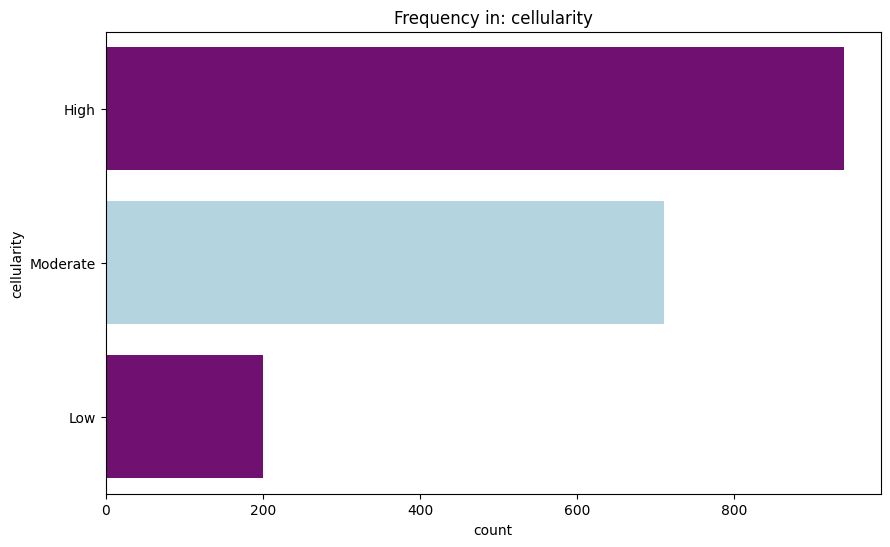

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


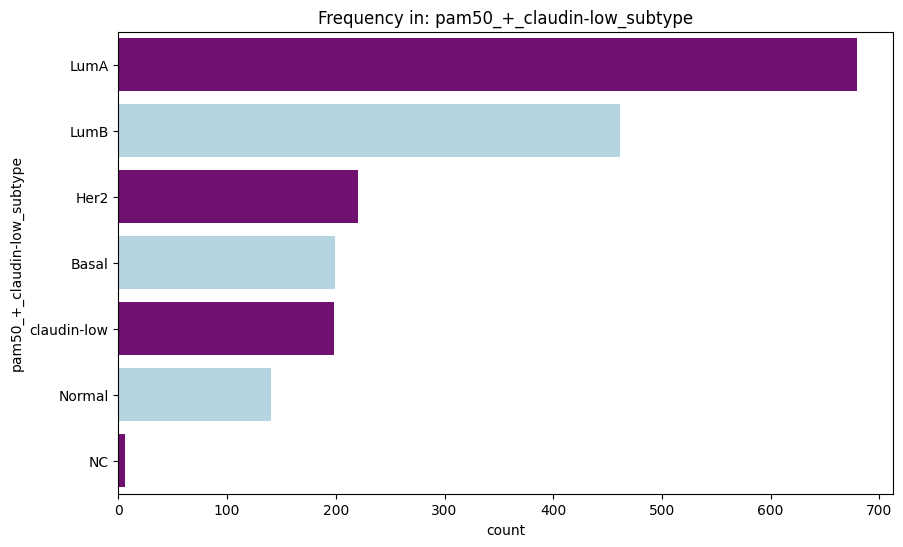

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


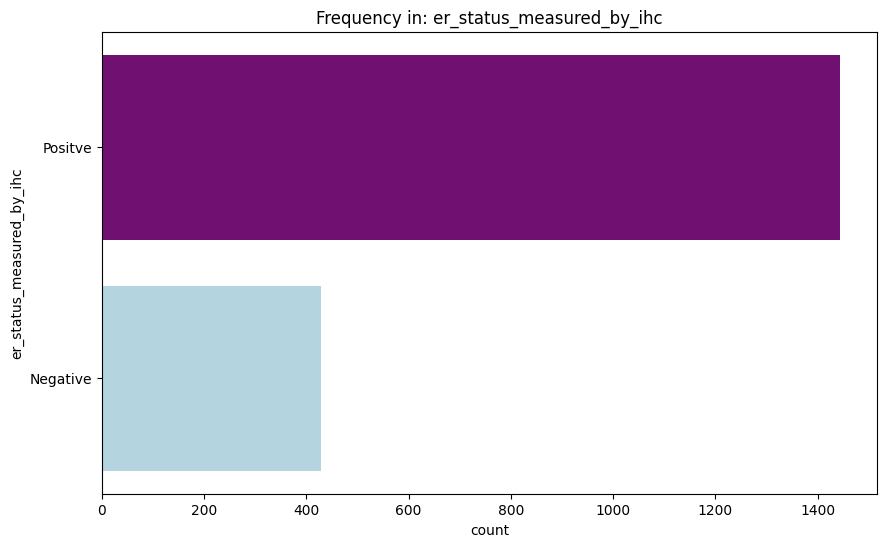

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


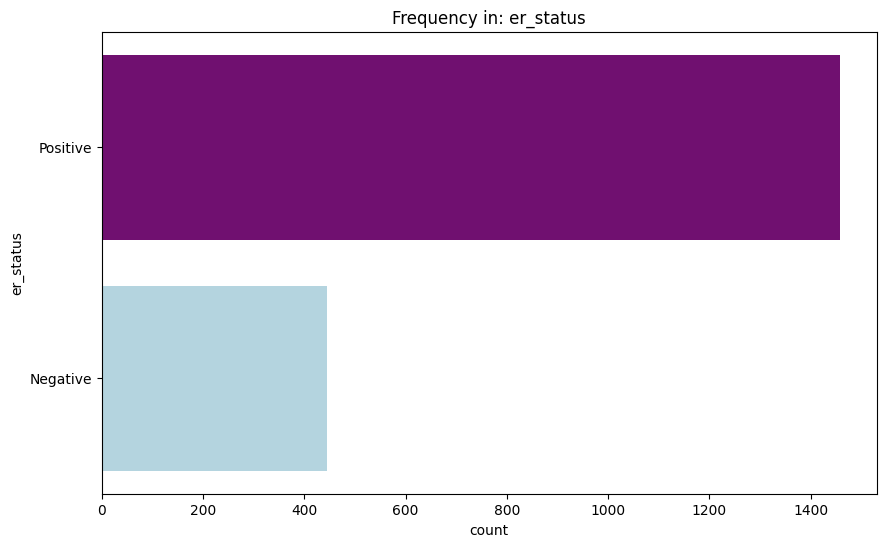

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


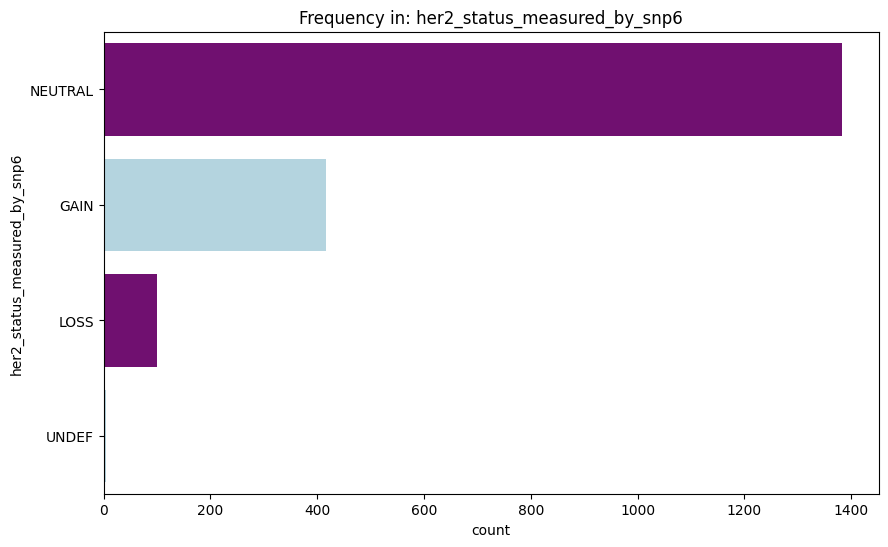

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


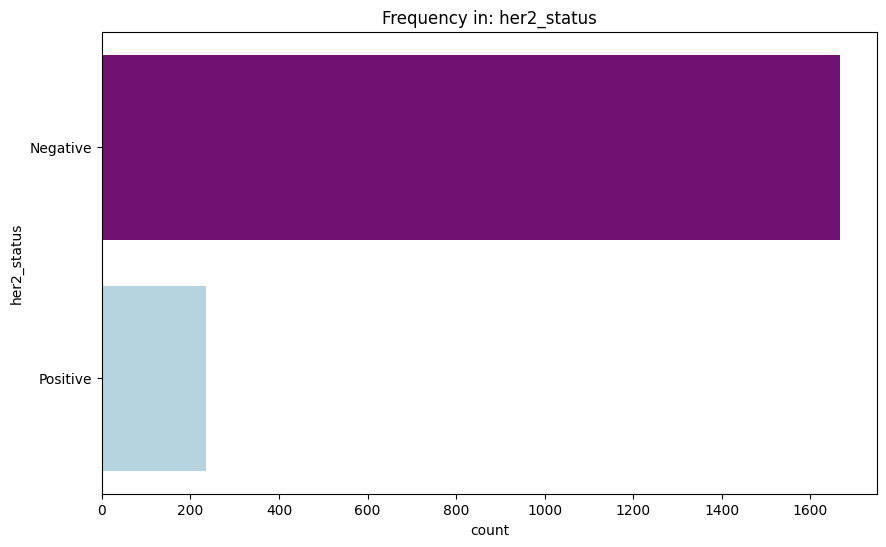

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


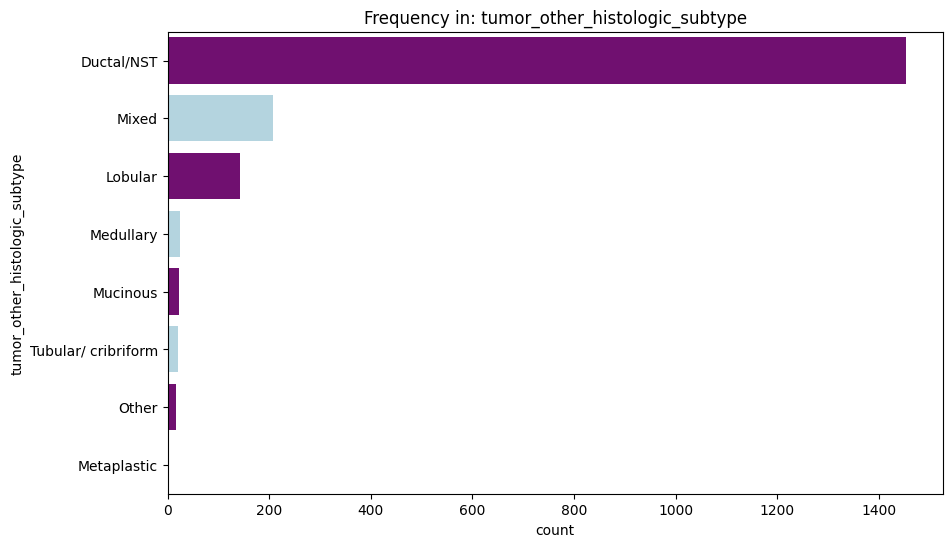

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


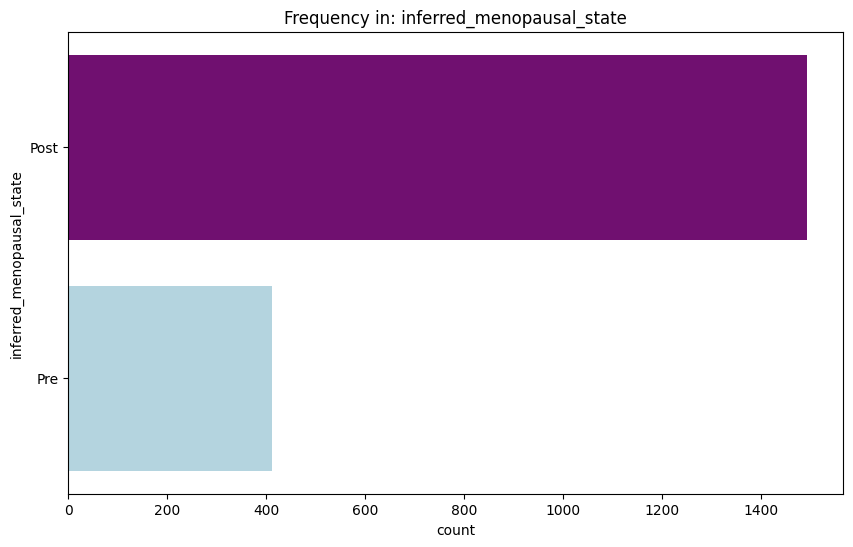

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


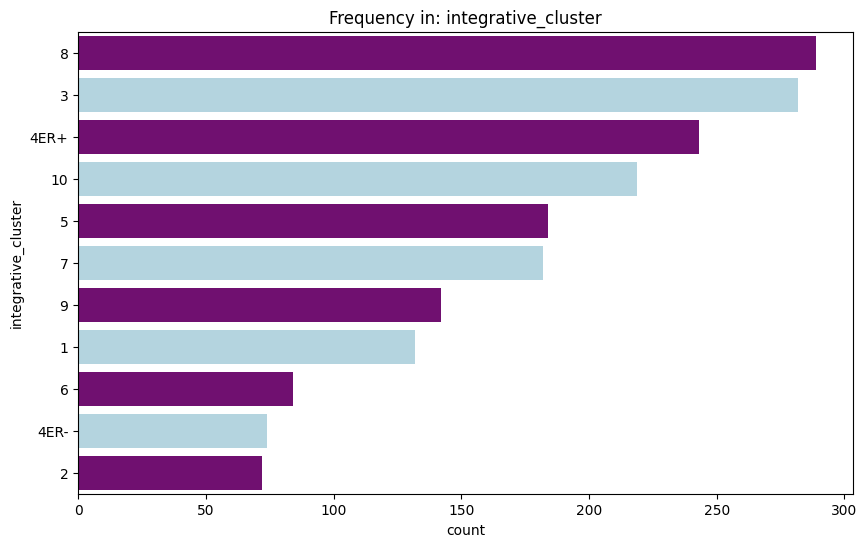

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


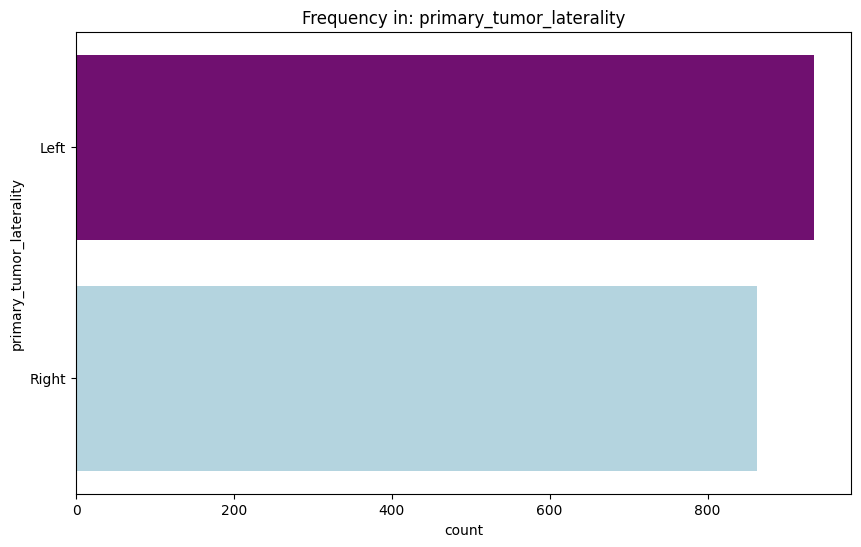

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


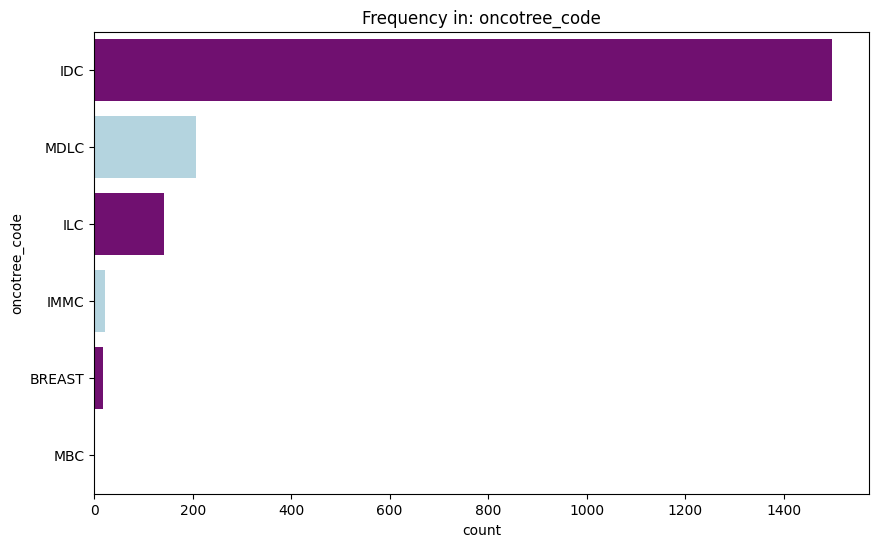

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


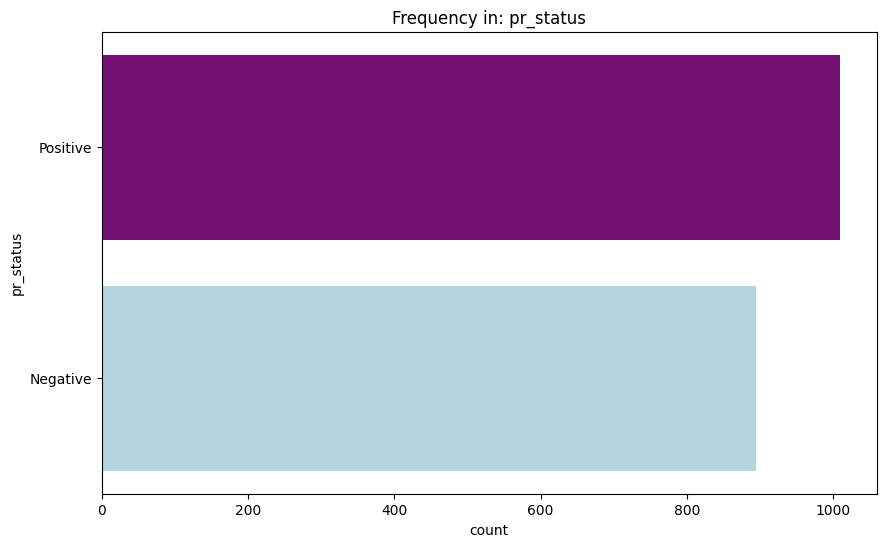

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


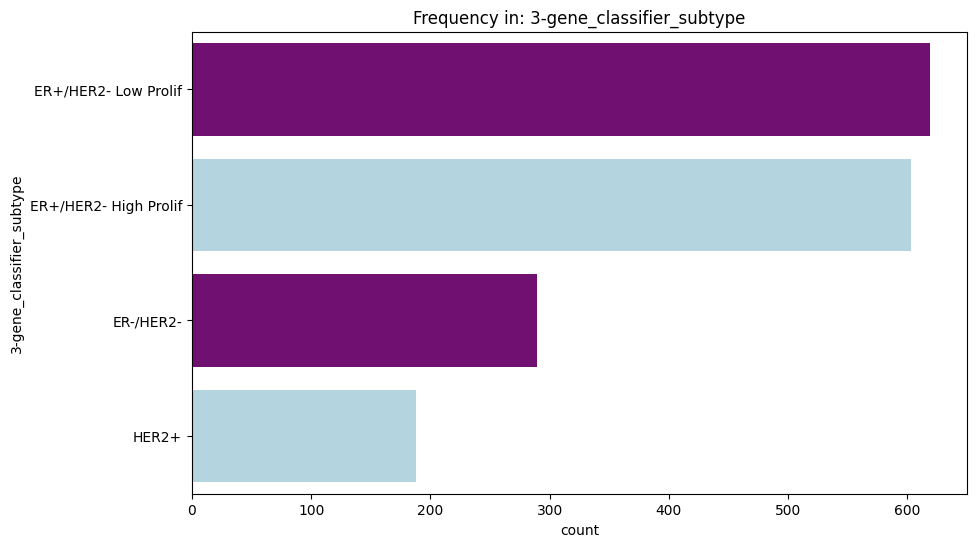

<ipython-input-14-02232001ef90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
<ipython-input-14-02232001ef90>:7: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])


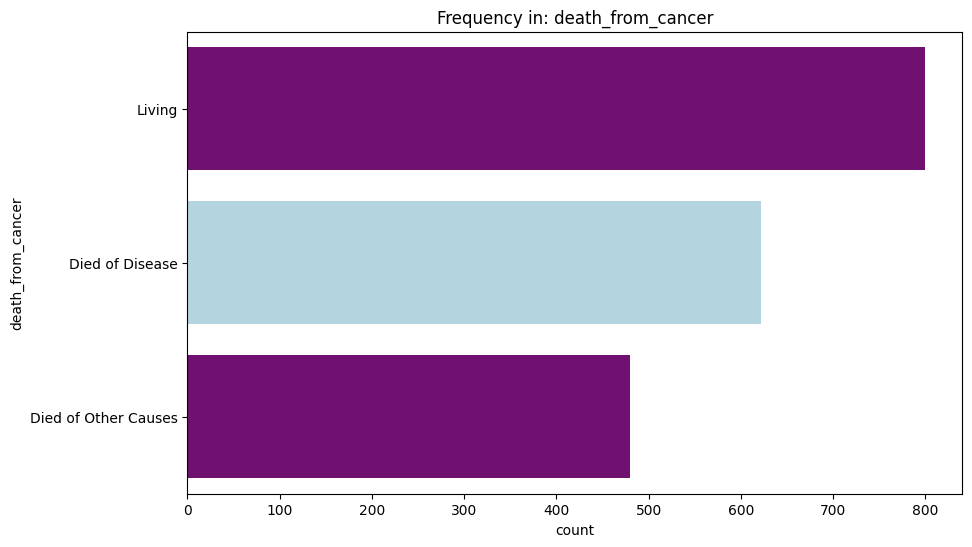

In [14]:
# Ograniczenie df_text do pierwszych 18 kolumn
df_text_limited = df_text.iloc[:, :17]

# Tworzenie wykresów słupkowych dla każdej z pierwszych 18 kolumn tekstowych
for column in df_text_limited.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_text_limited[column], order=df_text_limited[column].value_counts().index, palette=['purple', 'lightblue'])
    plt.title(f'Frequency in: {column}')
    plt.show()

# ANALIZA DANYCH NUMERYCZNYCH

In [6]:
df_numerical = df.select_dtypes(include=[np.number])
df_numerical

patient_id  age_at_diagnosis  chemotherapy  cohort  \
0              0             75.65             0     1.0   
1              2             43.19             0     1.0   
2              5             48.87             1     1.0   
3              6             47.68             1     1.0   
4              8             76.97             1     1.0   
...          ...               ...           ...     ...   
1899        7295             43.10             0     4.0   
1900        7296             42.88             0     4.0   
1901        7297             62.90             0     4.0   
1902        7298             61.16             0     4.0   
1903        7299             60.02             0     4.0   

      neoplasm_histologic_grade  hormone_therapy  \
0                           3.0                1   
1                           3.0                1   
2                           2.0                1   
3                           2.0                1   
4                           3.0                1   
...                         ...              ...   
1899                        3.0                1   
1900                        3.0                0   
1901                        3.0                1   
1902                        2.0                1   
1903                        3.0                1   

      lymph_nodes_examined_positive  mutation_count  \
0                              10.0             NaN   
1                               0.0             2.0   
2                               1.0             2.0   
3                               3.0             1.0   
4                               8.0             2.0   
...                             ...             ...   
1899                            1.0             4.0   
1900                            1.0             6.0   
1901                           45.0             4.0   
1902                           12.0            15.0   
1903                            1.0             3.0   

      nottingham_prognostic_index  overall_survival_months  ...  srd5a1  \
0                           6.044               140.500000  ... -1.1877   
1                           4.020                84.633333  ... -0.4412   
2                           4.030               163.700000  ... -0.5381   
3                           4.050               164.933333  ... -0.5630   
4                           6.080                41.366667  ... -0.5845   
...                           ...                      ...  ...     ...   
1899                        5.050               196.866667  ...  0.7859   
1900                        5.040                44.733333  ... -0.5294   
1901                        6.050               175.966667  ... -0.1457   
1902                        5.050                86.233333  ... -0.6380   
1903                        5.040               201.900000  ...  0.2067   

      srd5a2  srd5a3     st7    star    tnk2   tulp4  ugt2b15  ugt2b17  ugt2b7  
0    -0.0194 -1.6345 -0.2142 -0.5698 -1.1741 -1.4779  -0.5954  -0.8847 -0.3354  
1     0.4534  0.4068  0.7634  0.0231  0.9121 -0.9538  -0.2264   0.5398 -0.8920  
2     0.0668  0.8344  1.7227  0.4024 -3.7172 -1.5538   1.3701  -0.1078  0.3655  
3    -0.7078  0.8228  0.6819 -0.1948 -2.3286 -0.9924  -0.3154   0.2320 -0.4828  
4    -0.3544 -1.0150  2.2961  0.1817 -0.1572  0.0427   5.0048   3.8476  1.3223  
...      ...     ...     ...     ...     ...     ...      ...      ...     ...  
1899  1.5304  1.1196  0.8116  0.0958 -1.2644 -0.3566  -0.2615  -0.6371 -0.5540  
1900 -0.6610 -0.1610  0.2251  0.5127 -0.3412 -1.0703  -0.6950   0.0641 -0.8863  
1901 -0.5194  2.3968  0.5917 -0.8643 -1.3541 -1.8076  -0.1840   0.0967 -0.6264  
1902 -1.5275  1.1070  0.2194  1.4317 -0.6985 -0.6046  -0.4915  -0.2847 -0.8041  
1903 -0.9232 -0.3156  0.8828  0.7520 -1.4187  0.5257  -0.2316  -0.2081 -0.4328  

[1904 rows x 503 columns]

Mean:  61.09 
Standard deviation:  12.98 
Median:  61.77 
Minimum value:  21.93 
Maximum value:  96.29 
Variance:  168.45


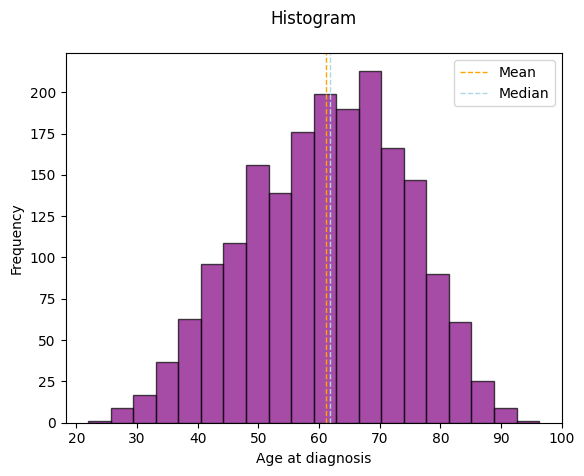

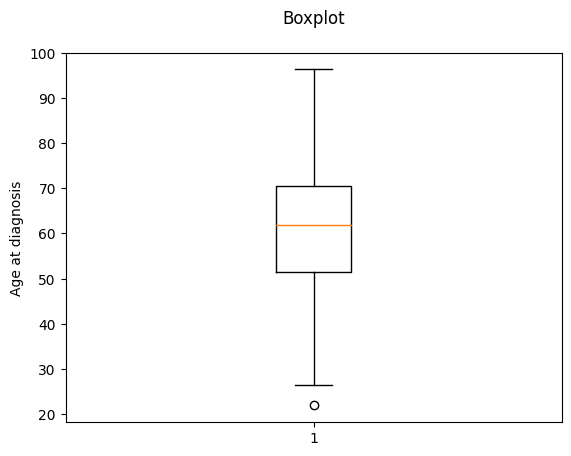

In [20]:
age=df['age_at_diagnosis']
mean=age.mean()
stdev=st.stdev(age)
median=age.median()
min_value=age.min()
max_value=age.max()
var=age.var()

print('Mean: ', round(mean,2),'\nStandard deviation: ' , round(stdev,2), '\nMedian: ', round(median,2),
      '\nMinimum value: ', min_value, '\nMaximum value: ', max_value, '\nVariance: ', round(var,2))

plt.hist(age, alpha=0.7, bins=20, color='purple', edgecolor='black')
plt.title('Histogram\n')
plt.xlabel('Age at diagnosis')
plt.ylabel('Frequency')
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='lightblue', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

plt.boxplot(age)
plt.title('Boxplot\n')
plt.ylabel('Age at diagnosis')
plt.show()

In [23]:
def statistical_analysis(df):
    
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            numeric_column = df[column]
            mean = round(numeric_column.mean(),2)
            stdev = round(numeric_column.std(),2)
            median = round(numeric_column.median(),2)
            min_value = round(numeric_column.min(),2)
            max_value = round(numeric_column.max(),2)
            var = round(numeric_column.var(), 2)

            plt.hist(numeric_column, alpha=0.7, bins=20, color='purple', edgecolor='black')
            plt.title(f'Histogram for {column}\n')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.axvline(mean, color='orange', linestyle='dashed', linewidth=1, label='Mean')
            plt.axvline(median, color='lightblue', linestyle='dashed', linewidth=1, label='Median')
            plt.legend()
            
            hist_plot = (f'{column}_histogram.png')
            plt.savefig(hist_plot)
            plt.close()

            numeric_stats = pd.DataFrame({
                'Column': [column],
                'Mean': [mean],
                'Standard Deviation': [stdev],
                'Median': [median],
                'Minimum Value': [min_value],
                'Maximum Value': [max_value],
                'Variance': [var]
            })

            numeric_stats.to_csv("numeric_statistics", index=False)

        #else:
            #analiza kategorycznych - jakieś obrazki - wykres bąbelkowy

In [24]:
statistical_analysis(df)

KeyboardInterrupt: 

# STANDARYZACJA I PODSTAWOWA REDUKCJA WYMIARÓW

In [18]:
numeryczne_dane = df.select_dtypes(include=['float64', 'int64'])
kategoryczne_dane = df.select_dtypes(include=['object'])

test=df
test[numeryczne_dane.columns] = df[numeryczne_dane.columns].fillna(df[numeryczne_dane.columns].mean())
test = test.dropna(subset=kategoryczne_dane.columns)
test

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
1              2             43.19      BREAST CONSERVING  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
5             10             78.77             MASTECTOMY  Breast Cancer   
8             28             86.41      BREAST CONSERVING  Breast Cancer   
9             35             84.22             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1884        7278             67.89             MASTECTOMY  Breast Cancer   
1886        7280             63.50             MASTECTOMY  Breast Cancer   
1889        7284             61.23             MASTECTOMY  Breast Cancer   
1891        7286             66.48             MASTECTOMY  Breast Cancer   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
1              Breast Invasive Ductal Carcinoma        High             0   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
5              Breast Invasive Ductal Carcinoma    Moderate             0   
8              Breast Invasive Ductal Carcinoma    Moderate             0   
9             Breast Invasive Lobular Carcinoma        High             0   
...                                         ...         ...           ...   
1884           Breast Invasive Ductal Carcinoma        High             0   
1886           Breast Invasive Ductal Carcinoma        High             0   
1889           Breast Invasive Ductal Carcinoma        High             0   
1891           Breast Invasive Ductal Carcinoma        High             0   
1899          Breast Invasive Lobular Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
1                           LumA     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
5                           LumB     1.0                   Positve  ...   
8                           LumB     1.0                   Positve  ...   
9                           Her2     1.0                  Negative  ...   
...                          ...     ...                       ...  ...   
1884                        LumA     4.0                   Positve  ...   
1886                        LumA     4.0                   Positve  ...   
1889                        LumA     4.0                   Positve  ...   
1891                        LumB     4.0                   Positve  ...   
1899                        LumA     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
1           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
5           0           0           0        0          0         0         0   
8           0           0           0        0          0         0         0   
9           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1884        0           0           0        0          0         0         0   
1886        0           0           0        0          0         0         0   
1889        0           0           0        0          0         0         0   
1891        0           0           0        0          0         0         0   
1899        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
1              0         0          0  
4              0         0          0  
5              0         0          0  
8              0         0          0  
9              0         0          0  
...          ...       ...        ...  
1884          

In [19]:
numeryczne_dane = test.select_dtypes(include=['float64', 'int64'])
kategoryczne_dane = test.select_dtypes(include=['object'])

pacjent_id = test['patient_id']
wiek_przy_diagnozie = test['age_at_diagnosis']

numeryczne_dane_do_standaryzacji = numeryczne_dane.loc[:, numeryczne_dane.nunique() > 2]
numeryczne_dane_bez_standaryzacji = numeryczne_dane.drop(numeryczne_dane_do_standaryzacji.columns, axis=1)

scaler = StandardScaler()
standaryzowane_dane = scaler.fit_transform(numeryczne_dane_do_standaryzacji)

df_standaryzowane = pd.DataFrame(data=standaryzowane_dane, columns=numeryczne_dane_do_standaryzacji.columns)
df_standaryzowane['patient_id'] = pacjent_id.reset_index(drop=True)
#df_standaryzowane['age_at_diagnosis'] = wiek_przy_diagnozie.reset_index(drop=True)
df_standaryzowane = pd.concat([df_standaryzowane, kategoryczne_dane.reset_index(drop=True), 
                               numeryczne_dane_bez_standaryzacji.reset_index(drop=True)], axis=1)
df_standaryzowane.drop('age_at_diagnosis', axis=1, inplace=True)
df_standaryzowane

patient_id    cohort  neoplasm_histologic_grade  \
0              2 -1.326747                   0.919140   
1              8 -1.326747                   0.919140   
2             10 -1.326747                   0.919140   
3             28 -1.326747                   0.919140   
4             35 -1.326747                  -0.653944   
...          ...       ...                        ...   
1514        7278  1.122012                  -0.653944   
1515        7280  1.122012                  -0.653944   
1516        7284  1.122012                   0.919140   
1517        7286  1.122012                   0.919140   
1518        7295  1.122012                   0.919140   

      lymph_nodes_examined_positive  mutation_count  \
0                         -0.502920       -0.903022   
1                          1.563865       -0.903022   
2                         -0.502920       -0.418952   
3                         -0.244572       -0.418952   
4                         -0.502920       -0.176917   
...                             ...             ...   
1514                      -0.244572       -0.660987   
1515                       1.047169        0.065117   
1516                      -0.244572       -0.176917   
1517                       0.272124       -0.903022   
1518                      -0.244572       -0.418952   

      nottingham_prognostic_index  overall_survival_months  tumor_size  \
0                       -0.011659                -0.553501   -1.068571   
1                        1.801793                -1.128083    0.891144   
2                        0.025314                -1.573849    0.303229   
3                        0.879221                -1.191827   -0.676628   
4                       -0.860285                -1.195811    0.107258   
...                           ...                      ...         ...   
1514                    -0.002856                 1.527036   -0.741952   
1515                     0.921476                 0.919253    0.891144   
1516                     0.877461                 1.018411   -0.741952   
1517                     0.895067                 0.429221   -0.088714   
1518                     0.895067                 0.936960   -0.088714   

      tumor_stage     brca1  ...  ndfip1_mut  hras_mut  prps2_mut  \
0       -1.369083 -1.398676  ...           0         0          0   
1        0.448875  1.338209  ...           0         0          0   
2        4.084792 -0.430241  ...           0         0          0   
3        0.448875  0.868786  ...           0         0          0   
4        0.448875 -1.018530  ...           0         0          0   
...           ...       ...  ...         ...       ...        ...   
1514    -0.004642 -0.422358  ...           0         0          0   
1515    -0.004642  0.103068  ...           0         0          0   
1516    -0.004642 -0.506721  ...           0         0          0   
1517    -0.004642 -0.269501  ...           0         0          0   
1518    -0.004642  0.174224  ...           0         0          0   

      smarcb1_mut  stmn2_mut  siah1_mut  chemotherapy  hormone_therapy  \
0               0          0          0             0                1   
1               0          0          0             1                1   
2               0          0          0             0                1   
3               0          0          0             0                1   
4               0          0          0             0                0   
...           ...        ...        ...           ...              ...   
1514            0          0          0             0                1   
1515            0          0          0             0                1   
1516            0          0          0             0                1   
1517            0          0          0             0                1   
1518            0          0          0             0                1   

      overall_survival  radio_therapy  
0            

In [26]:
prog_procentowy = 80
procent_najczestszej_wartosci = (kategoryczne_dane.apply(lambda col: col.value_counts().max() / len(col)) * 100)
kolumny_do_usuniecia = procent_najczestszej_wartosci[procent_najczestszej_wartosci > prog_procentowy].index

df_new = df_standaryzowane.drop(kolumny_do_usuniecia, axis=1)
df_new

patient_id    cohort  neoplasm_histologic_grade  \
0              2 -1.326747                   0.919140   
1              8 -1.326747                   0.919140   
2             10 -1.326747                   0.919140   
3             28 -1.326747                   0.919140   
4             35 -1.326747                  -0.653944   
...          ...       ...                        ...   
1514        7278  1.122012                  -0.653944   
1515        7280  1.122012                  -0.653944   
1516        7284  1.122012                   0.919140   
1517        7286  1.122012                   0.919140   
1518        7295  1.122012                   0.919140   

      lymph_nodes_examined_positive  mutation_count  \
0                         -0.502920       -0.903022   
1                          1.563865       -0.903022   
2                         -0.502920       -0.418952   
3                         -0.244572       -0.418952   
4                         -0.502920       -0.176917   
...                             ...             ...   
1514                      -0.244572       -0.660987   
1515                       1.047169        0.065117   
1516                      -0.244572       -0.176917   
1517                       0.272124       -0.903022   
1518                      -0.244572       -0.418952   

      nottingham_prognostic_index  overall_survival_months  tumor_size  \
0                       -0.011659                -0.553501   -1.068571   
1                        1.801793                -1.128083    0.891144   
2                        0.025314                -1.573849    0.303229   
3                        0.879221                -1.191827   -0.676628   
4                       -0.860285                -1.195811    0.107258   
...                           ...                      ...         ...   
1514                    -0.002856                 1.527036   -0.741952   
1515                     0.921476                 0.919253    0.891144   
1516                     0.877461                 1.018411   -0.741952   
1517                     0.895067                 0.429221   -0.088714   
1518                     0.895067                 0.936960   -0.088714   

      tumor_stage     brca1  ...  oncotree_code  pr_status  \
0       -1.369083 -1.398676  ...            IDC   Positive   
1        0.448875  1.338209  ...           MDLC   Positive   
2        4.084792 -0.430241  ...            IDC   Positive   
3        0.448875  0.868786  ...            IDC   Negative   
4        0.448875 -1.018530  ...            ILC   Negative   
...           ...       ...  ...            ...        ...   
1514    -0.004642 -0.422358  ...            IDC   Positive   
1515    -0.004642  0.103068  ...            IDC   Positive   
1516    -0.004642 -0.506721  ...            IDC   Negative   
1517    -0.004642 -0.269501  ...            IDC   Negative   
1518    -0.004642  0.174224  ...            ILC   Positive   

      3-gene_classifier_subtype     death_from_cancer  pik3ca_mut   tp53_mut  \
0         ER+/HER2- High Prolif                Living           0      H178P   
1         ER+/HER2- High Prolif       Died of Disease           0      S241F   
2         ER+/HER2- High Prolif       Died of Disease      H1047R  P67Qfs*56   
3         ER+/HER2- High Prolif  Died of Other Causes           0      C242R   
4         ER+/HER2- High Prolif       Died of Disease      H1047R          0   
...                         ...                   ...         ...        ...   
1514       ER+/HER2- Low Prolif  Died of Other Causes      H1047R          0   
1515      ER+/HER2- High Prolif                Living           0          0   
1516       ER+/HER2- Low Prolif  Died of Other Causes           0          0   
1517      ER+/HER2- High Prolif  Died of Other Causes           0          0   
1518       ER+/HER2- Low Prolif                Living       E542K          0   

      chemotherapy  hormone_therapy  overall_survival  radio_ther

In [27]:
df_new.to_csv("standarized_data.csv", index=False)